In [39]:

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU, LSTM
from keras.optimizers import Adam
from keras.preprocessing.sequence import TimeseriesGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU, LSTM
from keras.optimizers import Adam
from keras.preprocessing.sequence import TimeseriesGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#import data
daily_metrics_sorted =pd.read_csv('../dataset/daily_metrics_sorted.csv', parse_dates=['date'])
price_volume_sorted = pd.read_csv('../dataset/price_volume_sorted.csv', parse_dates=['date'])
event_filtered= pd.read_csv('../dataset/event_filtered.csv', parse_dates=['date'])



In [4]:
tickers_df =pd.read_csv('../dataset/tickers.csv')
tickers = tickers_df.to_numpy()

In [5]:
tickers_df.head()

0
0  ABIO
1  AGTC
2   AIM
3  AIRT
4  ALSK

In [6]:
#flatten the array
tickers = tickers.flatten()

In [7]:
tickers

array(['ABIO', 'AGTC', 'AIM', ..., 'JUHL', 'OPST', 'IDAH'], dtype=object)

In [8]:
daily_metrics_sorted.head()

ticker       date lastupdated     ev  evebit  evebitda  marketcap   pb  \
0   AAME 2015-03-31  2018-10-18  100.3    15.4      13.5       82.9  0.8   
1   AAME 2015-04-01  2018-10-18   99.3    15.3      13.3       81.9  0.8   
2   AAME 2015-04-02  2018-10-18   98.9    15.2      13.3       81.5  0.8   
3   AAME 2015-04-06  2018-10-18   98.9    15.2      13.3       81.5  0.8   
4   AAME 2015-04-07  2018-10-18   98.5    15.1      13.2       81.1  0.8   

     pe   ps  sales   evsales  
0  20.9  0.5  41.45  2.419783  
1  20.7  0.5  40.95  2.424908  
2  20.6  0.5  40.75  2.426994  
3  20.6  0.5  40.75  2.426994  
4  20.5  0.5  40.55  2.429100

In [9]:
price_volume_sorted.head()

ticker       date   open  high    low  close   volume  dividends  \
0   AAME 2015-01-02  3.990  4.03  3.980   4.03  11443.0        0.0   
1   AAME 2015-01-05  3.900  4.01  3.900   4.01  13727.0        0.0   
2   AAME 2015-01-06  3.950  3.95  3.750   3.92   9743.0        0.0   
3   AAME 2015-01-07  3.899  3.92  3.870   3.92   1486.0        0.0   
4   AAME 2015-01-08  3.920  3.95  3.915   3.95   2200.0        0.0   

   closeunadj lastupdated  
0        4.03  2018-06-13  
1        4.01  2018-06-13  
2        3.92  2018-06-13  
3        3.92  2018-06-13  
4        3.95  2018-06-13

In [10]:
event_filtered.head()

ticker       date   eventcodes  11  12  13  14  21  22  23  ...  52  53  54  \
0   ABIO 2020-12-23        52|91   0   0   0   0   0   0   0  ...   1   0   0   
1   AGTC 2020-12-23        71|91   0   0   0   0   0   0   0  ...   0   0   0   
2    AIM 2020-12-23           11   1   0   0   0   0   0   0  ...   0   0   0   
3   AIRT 2020-12-23  11|23|71|91   1   0   0   0   0   0   1  ...   0   0   0   
4   ALSK 2020-12-23           35   0   0   0   0   0   0   0  ...   0   0   0   

   55  56  57  58  71  81  91  
0   0   0   0   0   0   0   1  
1   0   0   0   0   1   0   1  
2   0   0   0   0   0   0   0  
3   0   0   0   0   1   0   1  
4   0   0   0   0   0   0   0  

[5 rows x 32 columns]

# Cleaning up and merging Data

## CLean up event_filtered

In [11]:
# drop eventcodes
event_filtered = event_filtered.drop(columns ='eventcodes')



In [12]:
# make date the index
event_filtered.set_index('date', inplace=True)


In [13]:
event_filtered.sort_values('ticker', ascending=True, inplace=True)


In [14]:
event_filtered.head()

ticker  11  12  13  14  21  22  23  24  25  ...  52  53  54  55  \
date                                                   ...                   
2018-05-02   AAME   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
2019-05-13   AAME   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   
2018-03-26   AAME   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   
2020-08-11   AAME   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   
2017-11-20   AAME   0   0   0   0   0   0   0   0   0  ...   1   0   0   0   

            56  57  58  71  81  91  
date                                
2018-05-02   0   1   0   0   0   0  
2019-05-13   0   0   0   0   0   1  
2018-03-26   0   0   0   0   0   1  
2020-08-11   0   0   0   0   0   1  
2017-11-20   0   0   0   0   0   1  

[5 rows x 30 columns]

In [15]:
event_filtered.tail()

ticker  11  12  13  14  21  22  23  24  25  ...  52  53  54  55  \
date                                                   ...                   
2020-07-20   ZYXI   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
2020-01-07   ZYXI   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   
2020-07-17   ZYXI   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   
2019-07-23   ZYXI   0   0   0   0   0   0   0   0   0  ...   1   0   0   0   
2015-12-31   ZYXI   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   

            56  57  58  71  81  91  
date                                
2020-07-20   0   0   0   0   0   0  
2020-01-07   0   0   0   0   0   1  
2020-07-17   0   0   0   1   0   1  
2019-07-23   0   0   0   0   0   1  
2015-12-31   0   0   0   1   0   1  

[5 rows x 30 columns]

# Clean up price volume

In [16]:
#drop multiple columns and let close = closeunadj
price_volume_sorted['close'] = price_volume_sorted['closeunadj']
price_volume_sorted = price_volume_sorted.drop(columns=['lastupdated', 'closeunadj','dividends'],axis = 1 )

In [17]:
price_volume_sorted.set_index('date', inplace=True)


In [18]:
price_volume_sorted.head()

ticker   open  high    low  close   volume
date                                                 
2015-01-02   AAME  3.990  4.03  3.980   4.03  11443.0
2015-01-05   AAME  3.900  4.01  3.900   4.01  13727.0
2015-01-06   AAME  3.950  3.95  3.750   3.92   9743.0
2015-01-07   AAME  3.899  3.92  3.870   3.92   1486.0
2015-01-08   AAME  3.920  3.95  3.915   3.95   2200.0

# Clean up daily metrics

In [19]:
daily_metrics_sorted = daily_metrics_sorted.drop(columns=['lastupdated'],axis = 1 )

In [20]:
daily_metrics_sorted.set_index('date', inplace=True)


In [21]:
daily_metrics_sorted.head()

ticker     ev  evebit  evebitda  marketcap   pb    pe   ps  sales  \
date                                                                           
2015-03-31   AAME  100.3    15.4      13.5       82.9  0.8  20.9  0.5  41.45   
2015-04-01   AAME   99.3    15.3      13.3       81.9  0.8  20.7  0.5  40.95   
2015-04-02   AAME   98.9    15.2      13.3       81.5  0.8  20.6  0.5  40.75   
2015-04-06   AAME   98.9    15.2      13.3       81.5  0.8  20.6  0.5  40.75   
2015-04-07   AAME   98.5    15.1      13.2       81.1  0.8  20.5  0.5  40.55   

             evsales  
date                  
2015-03-31  2.419783  
2015-04-01  2.424908  
2015-04-02  2.426994  
2015-04-06  2.426994  
2015-04-07  2.429100

# Time Period

In [22]:
daily_metrics_sorted.tail()

ticker     ev  evebit  evebitda  marketcap   pb    pe   ps  \
date                                                                    
2020-12-14   ZYXI  427.1    36.6      31.6      463.4  8.5  45.3  6.7   
2020-12-15   ZYXI  421.6    36.1      31.2      457.9  8.4  44.7  6.7   
2020-12-16   ZYXI  445.6    38.1      32.9      481.9  8.9  47.1  7.0   
2020-12-17   ZYXI  458.8    39.3      33.9      495.1  9.1  48.4  7.2   
2020-12-18   ZYXI  450.1    38.5      33.3      486.4  9.0  47.5  7.1   

              sales   evsales  
date                           
2020-12-14  3104.78  0.137562  
2020-12-15  3067.93  0.137422  
2020-12-16  3373.30  0.132096  
2020-12-17  3564.72  0.128706  
2020-12-18  3453.44  0.130334

In [23]:
daily_metrics_sorted_one_year = daily_metrics_sorted.loc['2020-11-18':'2020-12-18']
daily_metrics_sorted_one_year.head()

ticker    ev  evebit  evebitda  marketcap   pb    pe   ps  sales  \
date                                                                          
2020-11-18   AAME  69.1    17.8      13.6       44.3  0.3  37.2  0.2   8.86   
2020-11-19   AAME  68.7    17.7      13.6       43.9  0.3  36.8  0.2   8.78   
2020-11-20   AAME  69.9    18.0      13.8       45.1  0.4  37.8  0.2   9.02   
2020-11-23   AAME  69.1    17.8      13.6       44.3  0.3  37.2  0.2   8.86   
2020-11-24   AAME  67.5    17.4      13.3       42.7  0.3  35.8  0.2   8.54   

             evsales  
date                  
2020-11-18  7.799097  
2020-11-19  7.824601  
2020-11-20  7.749446  
2020-11-23  7.799097  
2020-11-24  7.903981

In [24]:
price_volume_sorted_one_year = price_volume_sorted.loc['2020-11-18':'2020-12-18']
price_volume_sorted_one_year.head()

ticker   open   high    low  close   volume
date                                                  
2020-11-18   AAME  2.210  2.220  2.141   2.17   4088.0
2020-11-19   AAME  2.195  2.195  2.100   2.15   1467.0
2020-11-20   AAME  2.170  2.210  2.170   2.21   5132.0
2020-11-23   AAME  2.210  2.210  2.144   2.17   2327.0
2020-11-24   AAME  2.150  2.250  2.085   2.09  12504.0

In [25]:
event_filtered_one_year = event_filtered.loc['2020-11-18':'2020-12-18']
event_filtered_one_year.head()

ticker  11  12  13  14  21  22  23  24  25  ...  52  53  54  55  \
date                                                   ...                   
2020-12-11   AAOI   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
2020-12-10   ABIO   0   0   0   0   0   0   0   0   0  ...   1   0   0   0   
2020-11-23   ABIO   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
2020-12-15   ABIO   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
2020-12-10   ABMC   1   0   0   0   0   0   0   0   0  ...   0   0   0   0   

            56  57  58  71  81  91  
date                                
2020-12-11   0   0   0   0   0   0  
2020-12-10   0   1   0   0   0   1  
2020-11-23   0   0   0   0   1   1  
2020-12-15   0   0   0   0   1   1  
2020-12-10   0   0   0   0   0   1  

[5 rows x 30 columns]

# Model Selection
As this is a time-series problem, we can use one of the following models to solve it:

- ARIMA/ARMA: Auto-Regressive Moving Average models are a class of model that captures a suite of different standard temporal structures in time series data.

- LSTM: Long-Short-Term_memory networks are a form of Recurrent Neural Networks. Few advantages of neural nets are:
Neural networks can model any non-linear function
Neural networks give good results without much parameter tuning

Aim: 
- We will try to predict the Price of the one stock based on the previous 60 values(i.e stock prices on the previous 30 days)
- We will only use the 'close' column to forecast the future stock price for simplicity. We will ignore all of the other columns.






# Model Preparation: Multiple Stocks

In [26]:
#store all the ticker into 1 list
stockList = price_volume_sorted.ticker.unique().tolist()
stockList

['AAME',
 'AAOI',
 'AAPC',
 'ABCD',
 'ABCP',
 'ABDC',
 'ABEO',
 'ABHD',
 'ABIO',
 'ABMC',
 'ACER',
 'ACFC',
 'ACFN',
 'ACHV',
 'ACIIQ',
 'ACMC',
 'ACNB',
 'ACRX',
 'ACSF',
 'ACTL',
 'ACU',
 'ACUR',
 'ACW',
 'ACY',
 'ADEP',
 'ADGE',
 'ADMA',
 'ADMG',
 'ADMP',
 'ADMT',
 'ADNC',
 'ADUS',
 'ADYX',
 'AE',
 'AEGG',
 'AEHR',
 'AEPI',
 'AERG',
 'AERI',
 'AERT',
 'AEY',
 'AFCB',
 'AFFMQ',
 'AFHIF',
 'AFPW',
 'AGHC',
 'AGNU',
 'AGRX',
 'AGTC',
 'AGYS',
 'AHC',
 'AHH',
 'AHPI',
 'AIII',
 'AIKI',
 'AIM',
 'AINC',
 'AIQ1',
 'AIRI',
 'AIRT',
 'AJSB',
 'AJX',
 'AKAOQ',
 'AKBA',
 'AKER',
 'AKTS',
 'ALBO',
 'ALDX',
 'ALIM',
 'ALLB',
 'ALLM',
 'ALOT',
 'ALSK',
 'ALT',
 'ALTV',
 'ALTX',
 'ALXA',
 'AMBR',
 'AMCO',
 'AMIC',
 'AMNB',
 'AMOT',
 'AMPE',
 'AMRB',
 'AMRK',
 'AMRS',
 'AMS',
 'AMSC',
 'AMSWA',
 'AMTX',
 'AMTY',
 'AMZG',
 'ANAD',
 'ANCB',
 'ANCX',
 'ANDR',
 'ANFC',
 'ANIX',
 'ANRZQ',
 'ANTH',
 'AOLS',
 'AOSL',
 'AOXG',
 'AP',
 'APDN',
 'APEN',
 'APEX',
 'APPCQ',
 'APPS',
 'APT',
 'APTS',
 'APYX',


In [27]:
# this is reading it in as a pandas but we lose some information in the process
# stocks_close = (
#     (pd.concat(
#         [pd.read_csv(f"../dataset/price_volume_tickers/{ticker}.csv", index_col='date', parse_dates=True)[
#             'close'
#         ].rename(ticker)
#         for ticker in tickers],
#         axis=1,
#         sort=True)
#     )
# )

# stocks_close

In [28]:
#reading in data from price_volume_tickers as a dictionary
df_ = {}
for i in stockList:
    df_[i] = pd.read_csv("../dataset/price_volume_tickers/" + i + ".csv", index_col= "date", parse_dates=["date"])

In [29]:
df_.keys()

dict_keys(['AAME', 'AAOI', 'AAPC', 'ABCD', 'ABCP', 'ABDC', 'ABEO', 'ABHD', 'ABIO', 'ABMC', 'ACER', 'ACFC', 'ACFN', 'ACHV', 'ACIIQ', 'ACMC', 'ACNB', 'ACRX', 'ACSF', 'ACTL', 'ACU', 'ACUR', 'ACW', 'ACY', 'ADEP', 'ADGE', 'ADMA', 'ADMG', 'ADMP', 'ADMT', 'ADNC', 'ADUS', 'ADYX', 'AE', 'AEGG', 'AEHR', 'AEPI', 'AERG', 'AERI', 'AERT', 'AEY', 'AFCB', 'AFFMQ', 'AFHIF', 'AFPW', 'AGHC', 'AGNU', 'AGRX', 'AGTC', 'AGYS', 'AHC', 'AHH', 'AHPI', 'AIII', 'AIKI', 'AIM', 'AINC', 'AIQ1', 'AIRI', 'AIRT', 'AJSB', 'AJX', 'AKAOQ', 'AKBA', 'AKER', 'AKTS', 'ALBO', 'ALDX', 'ALIM', 'ALLB', 'ALLM', 'ALOT', 'ALSK', 'ALT', 'ALTV', 'ALTX', 'ALXA', 'AMBR', 'AMCO', 'AMIC', 'AMNB', 'AMOT', 'AMPE', 'AMRB', 'AMRK', 'AMRS', 'AMS', 'AMSC', 'AMSWA', 'AMTX', 'AMTY', 'AMZG', 'ANAD', 'ANCB', 'ANCX', 'ANDR', 'ANFC', 'ANIX', 'ANRZQ', 'ANTH', 'AOLS', 'AOSL', 'AOXG', 'AP', 'APDN', 'APEN', 'APEX', 'APPCQ', 'APPS', 'APT', 'APTS', 'APYX', 'ARCW', 'ARCX', 'ARDMQ', 'ARDX', 'ARGS', 'ARIS', 'ARKR', 'ARL', 'ARMP', 'ARNI', 'AROPQ', 'ARQL', 'ART

In [30]:
#check the dictionary that we've created
for i in df_:
    print (i, df_[i])

AAME             Unnamed: 0 ticker   open  high    low  close   volume  dividends  \
date                                                                           
2015-01-02    10110349   AAME  3.990  4.03  3.980  4.030  11443.0        0.0   
2015-01-05    10103565   AAME  3.900  4.01  3.900  4.010  13727.0        0.0   
2015-01-06    10096779   AAME  3.950  3.95  3.750  3.920   9743.0        0.0   
2015-01-07    10089992   AAME  3.899  3.92  3.870  3.920   1486.0        0.0   
2015-01-08    10083204   AAME  3.920  3.95  3.915  3.950   2200.0        0.0   
...                ...    ...    ...   ...    ...    ...      ...        ...   
2020-12-14    10137913   AAME  2.330  2.33  2.265  2.315   6081.0        0.0   
2020-12-15    10145760   AAME  2.270  2.33  2.211  2.240   5707.0        0.0   
2020-12-16    10155686   AAME  2.200  2.33  2.200  2.290   8623.0        0.0   
2020-12-17    10162956   AAME  2.250  2.33  2.170  2.230   9770.0        0.0   
2020-12-18    10172368   AAME  2.19

[124 rows x 10 columns]
ADUS             Unnamed: 0 ticker    open     high      low   close    volume  \
date                                                                        
2015-01-02    10110455   ADUS   24.29   24.290   23.310   24.02   39600.0   
2015-01-05    10103671   ADUS   23.99   24.680   23.990   24.19   52900.0   
2015-01-06    10096885   ADUS   24.31   24.310   23.660   24.04   77400.0   
2015-01-07    10090098   ADUS   24.02   24.420   22.960   24.01  257900.0   
2015-01-08    10083310   ADUS   24.03   24.120   23.250   23.45   65500.0   
...                ...    ...     ...      ...      ...     ...       ...   
2020-12-14    10138027   ADUS  105.85  105.920  103.460  103.46   54726.0   
2020-12-15    10145874   ADUS  104.16  108.210  103.745  107.79   95384.0   
2020-12-16    10155801   ADUS  108.55  109.905  107.930  109.29   65939.0   
2020-12-17    10163069   ADUS  109.55  112.560  109.550  112.56   53551.0   
2020-12-18    10172485   ADUS  113.52  116.080 

[1364 rows x 10 columns]
AKBA             Unnamed: 0 ticker    open    high     low  close      volume  \
date                                                                       
2015-01-02    10110582   AKBA  11.610  11.640  11.250  11.50    127674.0   
2015-01-05    10103798   AKBA  11.350  11.380  10.780  11.09    166148.0   
2015-01-06    10097012   AKBA  11.150  11.500  10.800  11.06     93342.0   
2015-01-07    10090225   AKBA  11.220  11.540  11.090  11.43    211854.0   
2015-01-08    10083437   AKBA  11.500  11.500  11.060  11.10     73776.0   
...                ...    ...     ...     ...     ...    ...         ...   
2020-12-14    10138156   AKBA   2.934   3.270   2.925   3.18  10301671.0   
2020-12-15    10146004   AKBA   3.233   3.260   3.000   3.08   4832129.0   
2020-12-16    10155932   AKBA   3.070   3.120   3.000   3.04   3026285.0   
2020-12-17    10163200   AKBA   3.065   3.130   2.980   3.11   4093669.0   
2020-12-18    10172616   AKBA   3.110   3.125   2.985   3.

ANCX             Unnamed: 0 ticker   open    high    low  close    volume  \
date                                                                   
2015-01-02    10110716   ANCX  16.89  17.080  16.80  16.85   13863.0   
2015-01-05    10103932   ANCX  17.06  17.130  16.87  16.87    6971.0   
2015-01-06    10097146   ANCX  16.89  17.000  16.88  16.89    9640.0   
2015-01-07    10090359   ANCX  17.00  17.000  16.85  16.88   25295.0   
2015-01-08    10083571   ANCX  16.99  17.146  16.94  17.13    5649.0   
...                ...    ...    ...     ...    ...    ...       ...   
2019-01-25     3247827   ANCX  23.96  24.400  23.84  24.21   68960.0   
2019-01-28     3241052   ANCX  24.15  24.350  24.01  24.33   51593.0   
2019-01-29     3234277   ANCX  24.32  24.530  24.17  24.31   27175.0   
2019-01-30     3227502   ANCX  24.38  24.450  24.11  24.19   30008.0   
2019-01-31     3220725   ANCX  24.18  24.230  23.40  23.61  252267.0   

            dividends  closeunadj lastupdated  
date      

[692 rows x 10 columns]
ASBI             Unnamed: 0 ticker   open   high    low  close  volume  dividends  \
date                                                                           
2015-01-02    10110848   ASBI  16.75  17.85  16.75  17.85  5356.0        0.0   
2015-01-05    10104064   ASBI  17.05  17.05  17.05  17.05  1000.0        0.0   
2015-01-06    10097278   ASBI  18.00  18.00  18.00  18.00   568.0        0.0   
2015-01-07    10090491   ASBI  18.00  18.00  18.00  18.00     0.0        0.0   
2015-01-08    10083703   ASBI  16.71  16.71  16.71  16.71   150.0        0.0   
...                ...    ...    ...    ...    ...    ...     ...        ...   
2015-12-24     8428861   ASBI  23.03  23.03  23.03  23.03     0.0        0.0   
2015-12-28     8422097   ASBI  23.39  23.39  22.96  23.11  3125.0        0.0   
2015-12-29     8415335   ASBI  23.15  23.21  23.15  23.21   264.0        0.0   
2015-12-30     8408572   ASBI  23.21  23.21  23.21  23.21    49.0        0.0   
2015-12-31 

[351 rows x 10 columns]
AVNW             Unnamed: 0 ticker   open    high     low  close    volume  \
date                                                                    
2015-01-02    10110954   AVNW  18.36  18.480  18.000  18.24    5575.0   
2015-01-05    10104170   AVNW  18.24  18.360  17.640  18.00    9768.0   
2015-01-06    10097384   AVNW  18.12  18.120  16.680  16.80    6991.0   
2015-01-07    10090597   AVNW  17.28  17.280  16.385  16.68    6417.0   
2015-01-08    10083809   AVNW  16.44  17.640  16.440  16.80    4803.0   
...                ...    ...    ...     ...     ...    ...       ...   
2020-12-14    10138570   AVNW  36.96  39.125  36.260  36.82  126304.0   
2020-12-15    10146414   AVNW  37.96  38.420  36.790  37.11  123785.0   
2020-12-16    10156343   AVNW  37.50  37.930  36.571  37.81  114795.0   
2020-12-17    10163610   AVNW  38.18  38.560  36.340  36.67   57105.0   
2020-12-18    10173039   AVNW  36.71  37.150  35.510  35.85   91965.0   

            dividends

BCOV             Unnamed: 0 ticker   open    high     low   close    volume  \
date                                                                     
2015-01-02    10111079   BCOV   7.87   7.890   7.510   7.740  124382.0   
2015-01-05    10104295   BCOV   7.70   7.855   7.580   7.720  159414.0   
2015-01-06    10097509   BCOV   7.75   7.810   7.343   7.580  138093.0   
2015-01-07    10090722   BCOV   7.64   7.830   7.500   7.800  173369.0   
2015-01-08    10083934   BCOV   7.88   7.910   7.700   7.900  162835.0   
...                ...    ...    ...     ...     ...     ...       ...   
2020-12-14    10138696   BCOV  16.84  17.290  16.840  17.015  179885.0   
2020-12-15    10146536   BCOV  17.11  17.284  16.720  17.000  143041.0   
2020-12-16    10156465   BCOV  17.09  17.420  17.059  17.190  172401.0   
2020-12-17    10163735   BCOV  17.24  17.690  17.240  17.620  169405.0   
2020-12-18    10173166   BCOV  17.71  17.980  17.630  17.850  569837.0   

            dividends  closeunad

[1503 rows x 10 columns]
BKTI             Unnamed: 0 ticker  open   high    low  close   volume  dividends  \
date                                                                           
2015-01-02    10111186   BKTI  4.87  4.880  4.620  4.810   6174.0        0.0   
2015-01-05    10104402   BKTI  4.81  4.900  4.780  4.880   8210.0        0.0   
2015-01-06    10097616   BKTI  4.82  4.830  4.800  4.800   1420.0        0.0   
2015-01-07    10090829   BKTI  4.75  4.750  4.630  4.750   2574.0        0.0   
2015-01-08    10084041   BKTI  4.75  4.750  4.660  4.680   8100.0        0.0   
...                ...    ...   ...    ...    ...    ...      ...        ...   
2020-12-14    10138815   BKTI  3.09  3.180  2.990  3.010  27639.0        0.0   
2020-12-15    10146658   BKTI  3.03  3.130  3.010  3.049  47915.0        0.0   
2020-12-16    10156579   BKTI  3.06  3.082  3.028  3.050   8261.0        0.0   
2020-12-17    10163852   BKTI  3.11  3.132  2.936  2.950  18469.0        0.0   
2020-12-18

[1503 rows x 10 columns]
BSRR             Unnamed: 0 ticker    open   high     low  close    volume  \
date                                                                    
2015-01-02    10111308   BSRR  17.620  17.64  17.000  17.18    4700.0   
2015-01-05    10104524   BSRR  17.180  17.26  16.740  16.78    7676.0   
2015-01-06    10097738   BSRR  16.740  16.86  16.250  16.34    8698.0   
2015-01-07    10090951   BSRR  16.500  16.50  16.220  16.49    6990.0   
2015-01-08    10084163   BSRR  16.600  16.62  16.440  16.53   14879.0   
...                ...    ...     ...    ...     ...    ...       ...   
2020-12-14    10138948   BSRR  23.997  24.19  23.740  23.81   33172.0   
2020-12-15    10146790   BSRR  24.150  24.34  23.800  24.19   54424.0   
2020-12-16    10156710   BSRR  24.190  24.72  24.145  24.35   46614.0   
2020-12-17    10163983   BSRR  24.560  24.59  24.030  24.48   28638.0   
2020-12-18    10173425   BSRR  24.660  24.66  23.770  23.97  130665.0   

            dividend

[1081 rows x 10 columns]
CAW             Unnamed: 0 ticker  open   high    low  close    volume  dividends  \
date                                                                            
2015-01-02    10111418    CAW  3.38  3.500  3.313   3.50    1800.0        0.0   
2015-01-05    10104634    CAW  3.37  3.500  3.300   3.48     904.0        0.0   
2015-01-06    10097848    CAW  3.34  3.580  3.300   3.58    2614.0        0.0   
2015-01-07    10091061    CAW  3.33  3.580  3.330   3.55     395.0        0.0   
2015-01-08    10084273    CAW  3.60  3.600  3.600   3.60     200.0        0.0   
...                ...    ...   ...    ...    ...    ...       ...        ...   
2019-04-08     2909912    CAW  1.37  1.390  1.310   1.35    5821.0        0.0   
2019-04-09     2903133    CAW  1.35  1.400  1.350   1.40   23291.0        0.0   
2019-04-10     2896354    CAW  1.39  1.442  1.370   1.39    6209.0        0.0   
2019-04-11     2889574    CAW  1.40  1.811  1.400   1.79   69422.0        0.0   

[1503 rows x 10 columns]
CDZI             Unnamed: 0 ticker   open    high    low   close    volume  \
date                                                                    
2015-01-02    10111509   CDZI  11.23  11.230  10.72  10.880   28574.0   
2015-01-05    10104725   CDZI  10.77  11.060  10.59  10.610   43984.0   
2015-01-06    10097939   CDZI  10.66  10.760  10.22  10.450   47074.0   
2015-01-07    10091152   CDZI  10.64  10.865  10.57  10.850   55742.0   
2015-01-08    10084364   CDZI  10.88  10.880  10.59  10.740   30446.0   
...                ...    ...    ...     ...    ...     ...       ...   
2020-12-14    10139160   CDZI  10.45  10.650  10.45  10.470  185646.0   
2020-12-15    10146998   CDZI  10.58  10.580  10.24  10.400  126175.0   
2020-12-16    10156912   CDZI  10.41  10.530  10.28  10.345  226249.0   
2020-12-17    10164193   CDZI  10.35  10.430  10.18  10.260  142055.0   
2020-12-18    10173632   CDZI  10.31  10.310   9.63   9.820  374375.0   

            dividend

CJJD             Unnamed: 0 ticker  open   high   low  close     volume  dividends  \
date                                                                            
2015-01-02    10111636   CJJD  2.90  2.900  2.40   2.56   358370.0        0.0   
2015-01-05    10104852   CJJD  2.59  2.590  2.35   2.46   156987.0        0.0   
2015-01-06    10098066   CJJD  2.52  2.571  2.33   2.34    55902.0        0.0   
2015-01-07    10091279   CJJD  2.33  2.500  2.33   2.40    94079.0        0.0   
2015-01-08    10084491   CJJD  3.00  3.200  2.61   2.64  1117874.0        0.0   
...                ...    ...   ...    ...   ...    ...        ...        ...   
2020-12-14    10139298   CJJD  1.01  1.045  1.01   1.02   372561.0        0.0   
2020-12-15    10147133   CJJD  1.03  1.030  1.00   1.01   213087.0        0.0   
2020-12-16    10157051   CJJD  1.02  1.065  1.00   1.03   440105.0        0.0   
2020-12-17    10164330   CJJD  1.06  1.070  1.02   1.06   375686.0        0.0   
2020-12-18    10173770 

[1503 rows x 10 columns]
COMS             Unnamed: 0 ticker  open  high   low  close    volume  dividends  \
date                                                                          
2015-01-02    10111775   COMS  7.60  7.60  7.20   7.40    2600.0        0.0   
2015-01-05    10104991   COMS  7.20  7.56  6.80   7.20    6800.0        0.0   
2015-01-06    10098205   COMS  7.20  7.60  7.00   7.04    3700.0        0.0   
2015-01-07    10091418   COMS  7.04  7.60  6.84   7.04    4400.0        0.0   
2015-01-08    10084630   COMS  7.00  7.60  7.00   7.44    2900.0        0.0   
...                ...    ...   ...   ...   ...    ...       ...        ...   
2020-12-14    10139458   COMS  1.52  1.52  1.32   1.35   77474.0        0.0   
2020-12-15    10147291   COMS  1.40  1.86  1.40   1.79  125777.0        0.0   
2020-12-16    10157206   COMS  1.78  1.78  1.50   1.69   63467.0        0.0   
2020-12-17    10164488   COMS  1.74  1.78  1.50   1.70   65754.0        0.0   
2020-12-18    10173926

[159 rows x 10 columns]
CRVP             Unnamed: 0 ticker   open   high    low  close   volume  dividends  \
date                                                                            
2015-01-02    10111876   CRVP  0.760  0.780  0.740  0.780   5800.0        0.0   
2015-01-05    10105092   CRVP  0.780  0.780  0.760  0.760  16600.0        0.0   
2015-01-06    10098306   CRVP  0.750  0.750  0.750  0.750   1000.0        0.0   
2015-01-07    10091518   CRVP  0.780  0.780  0.750  0.780   2100.0        0.0   
2015-01-08    10084730   CRVP  0.780  0.790  0.770  0.790  10900.0        0.0   
...                ...    ...    ...    ...    ...    ...      ...        ...   
2018-03-16     4706404   CRVP  0.969  0.970  0.969  0.969   7331.0        0.0   
2018-03-19     4699747   CRVP  0.962  0.962  0.962  0.962    792.0        0.0   
2018-03-20     4693087   CRVP  0.965  0.965  0.965  0.965    301.0        0.0   
2018-03-21     4686428   CRVP  0.969  0.970  0.962  0.970  43667.0        0.0   

[948 rows x 10 columns]
CWBC             Unnamed: 0 ticker  open  high    low  close  volume  dividends  \
date                                                                         
2015-01-02    10111992   CWBC  6.56  6.56  6.560   6.56     0.0        0.0   
2015-01-05    10105207   CWBC  6.56  6.65  6.530   6.65  9000.0        0.0   
2015-01-06    10098421   CWBC  6.64  6.65  6.640   6.65  8400.0        0.0   
2015-01-07    10091633   CWBC  6.65  6.65  6.650   6.65     0.0        0.0   
2015-01-08    10084845   CWBC  6.65  6.65  6.650   6.65     0.0        0.0   
...                ...    ...   ...   ...    ...    ...     ...        ...   
2020-12-14    10139657   CWBC  9.24  9.24  9.240   9.24   321.0        0.0   
2020-12-15    10147485   CWBC  9.24  9.24  9.050   9.10  2483.0        0.0   
2020-12-16    10157402   CWBC  9.20  9.25  9.060   9.06  1405.0        0.0   
2020-12-17    10164684   CWBC  9.15  9.25  8.983   9.22  4332.0        0.0   
2020-12-18    10174121   CWBC  9.24

DGII             Unnamed: 0 ticker   open   high     low  close    volume  \
date                                                                   
2015-01-02    10112108   DGII   9.29   9.37   8.960   9.26   62966.0   
2015-01-05    10105323   DGII   9.15   9.37   9.120   9.23   75809.0   
2015-01-06    10098537   DGII   9.03   9.20   8.870   8.94  111424.0   
2015-01-07    10091749   DGII   9.04   9.06   8.880   9.02   66918.0   
2015-01-08    10084961   DGII   9.06   9.09   8.810   8.90  253551.0   
...                ...    ...    ...    ...     ...    ...       ...   
2020-12-14    10139767   DGII  19.08  19.31  18.660  18.67  165794.0   
2020-12-15    10147591   DGII  18.81  19.45  18.638  19.36  202594.0   
2020-12-16    10157509   DGII  19.30  19.65  19.190  19.50  125863.0   
2020-12-17    10164792   DGII  19.65  19.85  19.290  19.51  135208.0   
2020-12-18    10174230   DGII  19.56  19.94  18.820  18.93  649440.0   

            dividends  closeunadj lastupdated  
date      

[1503 rows x 10 columns]
DYNT             Unnamed: 0 ticker   open   high    low  close    volume  \
date                                                                  
2015-01-02    10112255   DYNT  3.850  3.850  3.850  3.850    1000.0   
2015-01-05    10105470   DYNT  3.770  3.790  3.770  3.790     420.0   
2015-01-06    10098684   DYNT  3.790  3.790  3.660  3.730    2810.0   
2015-01-07    10091896   DYNT  3.750  3.790  3.670  3.670    9901.0   
2015-01-08    10085108   DYNT  3.778  3.850  3.710  3.730    3561.0   
...                ...    ...    ...    ...    ...    ...       ...   
2020-12-14    10139929   DYNT  0.800  0.825  0.780  0.825  186101.0   
2020-12-15    10147749   DYNT  0.800  0.850  0.799  0.840  182702.0   
2020-12-16    10157668   DYNT  0.854  0.854  0.825  0.831   65549.0   
2020-12-17    10164949   DYNT  0.820  0.840  0.820  0.838   48554.0   
2020-12-18    10174392   DYNT  0.832  0.849  0.820  0.820  185145.0   

            dividends  closeunadj lastupdated 

[405 rows x 10 columns]
ELSE             Unnamed: 0 ticker   open   high    low  close   volume  dividends  \
date                                                                            
2015-01-02    10112348   ELSE  3.911  3.911  3.911  3.911      0.0        0.0   
2015-01-05    10105563   ELSE  3.970  3.970  3.970  3.970    345.0        0.0   
2015-01-06    10098777   ELSE  3.990  3.990  3.990  3.990    263.0        0.0   
2015-01-07    10091989   ELSE  3.990  3.990  3.990  3.990     88.0        0.0   
2015-01-08    10085201   ELSE  4.180  4.180  4.180  4.180    554.0        0.0   
...                ...    ...    ...    ...    ...    ...      ...        ...   
2020-12-14    10140015   ELSE  4.280  4.378  4.080  4.100  51174.0        0.0   
2020-12-15    10147834   ELSE  4.200  4.220  4.100  4.130  13093.0        0.0   
2020-12-16    10157754   ELSE  4.130  4.180  4.050  4.100  20177.0        0.0   
2020-12-17    10165032   ELSE  4.060  4.120  4.020  4.050  15541.0        0.0   

[1503 rows x 10 columns]
ERII             Unnamed: 0 ticker   open   high    low  close    volume  \
date                                                                  
2015-01-02    10112441   ERII   5.34   5.37   5.11   5.21  108500.0   
2015-01-05    10105656   ERII   5.21   5.26   4.85   4.87  160100.0   
2015-01-06    10098871   ERII   4.87   4.87   4.55   4.57  316500.0   
2015-01-07    10092083   ERII   4.63   4.75   4.60   4.67  151100.0   
2015-01-08    10085295   ERII   4.69   4.89   4.69   4.81  158300.0   
...                ...    ...    ...    ...    ...    ...       ...   
2020-12-14    10140110   ERII  12.71  12.93  12.56  12.60  321886.0   
2020-12-15    10147927   ERII  12.75  13.00  12.67  13.00  332921.0   
2020-12-16    10157846   ERII  12.96  13.00  12.71  12.78  218668.0   
2020-12-17    10165123   ERII  12.80  13.11  12.66  13.07  217797.0   
2020-12-18    10174572   ERII  13.15  13.37  13.00  13.15  848740.0   

            dividends  closeunadj lastupdated 

[1503 rows x 10 columns]
FATE             Unnamed: 0 ticker   open     high    low   close     volume  \
date                                                                      
2015-01-02    10112560   FATE   4.60    5.180   4.60   5.140    73628.0   
2015-01-05    10105775   FATE   5.14    5.470   4.82   4.835    39153.0   
2015-01-06    10098990   FATE   5.05    5.226   4.65   4.850    17009.0   
2015-01-07    10092202   FATE   4.77    5.000   4.77   4.910    49735.0   
2015-01-08    10085414   FATE   5.07    5.070   4.86   4.878    34120.0   
...                ...    ...    ...      ...    ...     ...        ...   
2020-12-14    10140237   FATE  95.96  103.660  95.23  96.380  1270693.0   
2020-12-15    10148049   FATE  97.31   98.060  90.00  92.770   877784.0   
2020-12-16    10157968   FATE  93.10   94.030  90.00  92.070  1070975.0   
2020-12-17    10165246   FATE  92.55   93.580  90.08  92.250   996946.0   
2020-12-18    10174700   FATE  93.00   95.220  90.96  93.270  2618874.

FMBM             Unnamed: 0 ticker    open   high    low  close  volume  dividends  \
date                                                                            
2015-01-02    10112679   FMBM  19.490  19.49  19.49  19.49   100.0        0.0   
2015-01-05    10105894   FMBM  19.550  19.55  19.55  19.55   700.0        0.0   
2015-01-06    10099109   FMBM  19.550  19.55  19.55  19.55     0.0        0.0   
2015-01-07    10092321   FMBM  19.550  19.55  19.55  19.55     0.0        0.0   
2015-01-08    10085533   FMBM  19.550  19.55  19.55  19.55   200.0        0.0   
...                ...    ...     ...    ...    ...    ...     ...        ...   
2020-12-14    10145533   FMBM  23.080  23.08  23.08  23.08     0.0        0.0   
2020-12-15    10154274   FMBM  23.080  23.08  23.08  23.08     0.0        0.0   
2020-12-16    10158097   FMBM  23.775  23.82  23.06  23.06  1223.0        0.0   
2020-12-17    10169973   FMBM  23.060  23.06  23.06  23.06     0.0        0.0   
2020-12-18    10174829 

[1503 rows x 10 columns]
FULL             Unnamed: 0 ticker   open  high    low  close    volume  dividends  \
date                                                                            
2015-01-02    10112792   FULL  4.530  4.64  4.530   4.63   51877.0        0.0   
2015-01-05    10106006   FULL  4.670  4.90  4.640   4.81  144771.0        0.0   
2015-01-06    10099221   FULL  4.830  4.83  4.630   4.63   54815.0        0.0   
2015-01-07    10092433   FULL  4.690  4.88  4.660   4.88   61858.0        0.0   
2015-01-08    10085645   FULL  4.880  4.90  4.700   4.73   95980.0        0.0   
...                ...    ...    ...   ...    ...    ...       ...        ...   
2016-10-28     7004248   FULL  2.620  2.71  2.620   2.71   63938.0        0.0   
2016-10-31     6997574   FULL  2.690  2.69  2.619   2.66   21687.0        0.0   
2016-11-01     6990903   FULL  2.652  2.71  2.652   2.69  110015.0        0.0   
2016-11-02     6984230   FULL  2.670  2.69  2.650   2.69  179620.0        0.0  

[1503 rows x 10 columns]
GIDYL             Unnamed: 0 ticker   open   high    low  close    volume  \
date                                                                  
2015-01-02    10112897  GIDYL  0.190  0.190  0.190  0.190    5000.0   
2015-01-05    10106111  GIDYL  0.190  0.190  0.190  0.190       0.0   
2015-01-06    10099326  GIDYL  0.190  0.190  0.190  0.190   40000.0   
2015-01-07    10092538  GIDYL  0.190  0.220  0.190  0.200  253500.0   
2015-01-08    10085750  GIDYL  0.210  0.210  0.210  0.210    7000.0   
...                ...    ...    ...    ...    ...    ...       ...   
2020-09-08      463539  GIDYL  0.001  0.001  0.001  0.001       0.0   
2020-09-09      456573  GIDYL  0.001  0.001  0.001  0.001       0.0   
2020-09-10      449604  GIDYL  0.001  0.001  0.001  0.001       0.0   
2020-09-11      442630  GIDYL  0.001  0.001  0.001  0.001       0.0   
2020-09-14      435654  GIDYL  0.001  0.001  0.001  0.001       0.0   

            dividends  closeunadj lastupdated

[1148 rows x 10 columns]
GRBK             Unnamed: 0 ticker   open    high    low   close    volume  \
date                                                                    
2015-01-02    10113014   GRBK   8.08   8.380   8.00   8.210   72814.0   
2015-01-05    10106228   GRBK   8.16   8.210   7.62   7.680  106173.0   
2015-01-06    10099443   GRBK   7.82   7.880   7.23   7.540  162635.0   
2015-01-07    10092655   GRBK   7.60   7.730   7.35   7.640   47166.0   
2015-01-08    10085867   GRBK   7.70   7.930   7.50   7.500   63362.0   
...                ...    ...    ...     ...    ...     ...       ...   
2020-12-14    10140728   GRBK  22.35  22.940  22.34  22.440  334453.0   
2020-12-15    10148534   GRBK  22.52  23.229  22.43  23.080  284869.0   
2020-12-16    10158458   GRBK  23.30  23.540  22.58  22.960  265985.0   
2020-12-17    10165732   GRBK  23.31  24.160  23.30  24.035  349780.0   
2020-12-18    10175198   GRBK  24.12  24.350  23.52  23.570  451290.0   

            dividend

[1503 rows x 10 columns]
HCFT             Unnamed: 0 ticker   open   high     low  close    volume  \
date                                                                   
2015-01-02    10113128   HCFT  10.89  10.93  10.750  10.90   93002.0   
2015-01-05    10106342   HCFT  10.91  11.07  10.898  11.01   96429.0   
2015-01-06    10099557   HCFT  11.05  11.07  10.930  11.00  150654.0   
2015-01-07    10092769   HCFT  10.98  11.10  10.950  11.06  130804.0   
2015-01-08    10085981   HCFT  11.06  11.09  11.000  11.06   75481.0   
...                ...    ...    ...    ...     ...    ...       ...   
2020-12-14    10140856   HCFT   3.10   3.12   3.060   3.07   25208.0   
2020-12-15    10148659   HCFT   3.05   3.07   3.030   3.04   20356.0   
2020-12-16    10158585   HCFT   3.01   3.05   3.010   3.03   13809.0   
2020-12-17    10165855   HCFT   3.06   3.10   3.050   3.10   22117.0   
2020-12-18    10175325   HCFT   3.10   3.32   3.100   3.23  196842.0   

            dividends  closeunadj

HGEN             Unnamed: 0 ticker   open    high     low  close     volume  \
date                                                                     
2015-01-02    10113177   HGEN  70.80  74.400  68.400  74.40    70960.0   
2015-01-05    10106391   HGEN  74.80  78.000  73.200  74.00   183840.0   
2015-01-06    10099606   HGEN  74.40  75.200  70.000  73.20   352920.0   
2015-01-07    10092818   HGEN  23.60  24.800  19.200  20.80  2471260.0   
2015-01-08    10086030   HGEN  21.20  21.600  18.800  20.80   466480.0   
...                ...    ...    ...     ...     ...    ...        ...   
2020-12-14    10140894   HGEN   9.55  12.220   9.540  11.96  1348607.0   
2020-12-15    10148694   HGEN  13.25  13.350  10.060  10.78  2236416.0   
2020-12-16    10158621   HGEN  10.20  11.750  10.158  11.34  1081683.0   
2020-12-17    10165890   HGEN  11.31  14.360  11.310  14.04  2559624.0   
2020-12-18    10175360   HGEN  14.52  17.336  14.400  15.51  5456473.0   

            dividends  closeunad

[1503 rows x 10 columns]
IBTGF             Unnamed: 0 ticker  open  high   low  close    volume  dividends  \
date                                                                          
2015-01-02    10113364  IBTGF  0.37  0.38  0.36   0.36   17500.0        0.0   
2015-01-05    10106578  IBTGF  0.38  0.38  0.36   0.36   15600.0        0.0   
2015-01-06    10099793  IBTGF  0.36  0.36  0.34   0.34   32500.0        0.0   
2015-01-07    10093005  IBTGF  0.34  0.34  0.34   0.34     600.0        0.0   
2015-01-08    10086217  IBTGF  0.36  0.37  0.36   0.37    4000.0        0.0   
...                ...    ...   ...   ...   ...    ...       ...        ...   
2017-10-09     5431861  IBTGF  0.41  0.41  0.41   0.41    2000.0        0.0   
2017-10-10     5425246  IBTGF  0.41  0.41  0.40   0.40  403200.0        0.0   
2017-10-11     5418633  IBTGF  0.40  0.41  0.40   0.41  943100.0        0.0   
2017-10-12     5412017  IBTGF  0.41  0.41  0.41   0.41  640800.0        0.0   
2017-10-13     540539

[1187 rows x 10 columns]
IMNPQ             Unnamed: 0 ticker    open    high     low   close     volume  \
date                                                                       
2015-01-02    10113446  IMNPQ  38.800  40.200  37.000  40.000    1728.50   
2015-01-05    10106660  IMNPQ  38.200  41.200  38.200  38.800    2138.00   
2015-01-06    10099875  IMNPQ  39.400  40.000  38.000  38.000     578.70   
2015-01-07    10093087  IMNPQ  40.200  40.200  38.000  39.000     925.35   
2015-01-08    10086299  IMNPQ  40.000  46.400  40.000  44.000    5466.85   
...                ...    ...     ...     ...     ...     ...        ...   
2020-09-23      387243  IMNPQ   0.003   0.003   0.003   0.003  104001.00   
2020-09-24      380219  IMNPQ   0.003   0.003   0.003   0.003   24203.00   
2020-09-25      373190  IMNPQ   0.003   0.003   0.003   0.003    3000.00   
2020-09-28      366158  IMNPQ   0.003   0.004   0.003   0.003   49219.00   
2020-09-29      359126  IMNPQ   0.003   0.004   0.003   0

[1503 rows x 10 columns]
ISCO             Unnamed: 0 ticker    open    high    low   close     volume  \
date                                                                      
2015-01-02    10113556   ISCO  10.500  10.500  10.50  10.500   340000.0   
2015-01-05    10106770   ISCO  10.500  10.500  10.50  10.500   899000.0   
2015-01-06    10099985   ISCO  10.500  10.500   9.00   9.000  1386200.0   
2015-01-07    10093197   ISCO   9.000   9.000   9.00   9.000   447500.0   
2015-01-08    10086409   ISCO   9.000   9.000   9.00   9.000   232000.0   
...                ...    ...     ...     ...    ...     ...        ...   
2020-12-14    10141289   ISCO   0.480   0.500   0.48   0.490     9147.0   
2020-12-15    10149083   ISCO   0.485   0.485   0.43   0.463     5143.0   
2020-12-16    10159015   ISCO   0.465   0.465   0.43   0.465      661.0   
2020-12-17    10166278   ISCO   0.430   0.450   0.43   0.450      439.0   
2020-12-18    10175760   ISCO   0.440   0.480   0.43   0.480     7121.

[1503 rows x 10 columns]
JRJR             Unnamed: 0 ticker   open   high    low  close    volume  \
date                                                                  
2015-01-02    10113669   JRJR  8.960  8.960  8.960  8.960     200.0   
2015-01-05    10106882   JRJR  9.270  9.600  8.750  8.750    1300.0   
2015-01-06    10100097   JRJR  8.600  9.000  8.380  8.660    9200.0   
2015-01-07    10093309   JRJR  9.000  9.550  8.850  9.400   21100.0   
2015-01-08    10086521   JRJR  8.950  9.530  8.660  9.390    7400.0   
...                ...    ...    ...    ...    ...    ...       ...   
2018-03-23     4674850   JRJR  0.131  0.142  0.131  0.140  774570.0   
2018-03-26     4668184   JRJR  0.135  0.140  0.133  0.134  760876.0   
2018-03-27     4661516   JRJR  0.131  0.145  0.131  0.142  630775.0   
2018-03-28     4654845   JRJR  0.145  0.145  0.133  0.138  600681.0   
2018-03-29     4648169   JRJR  0.133  0.134  0.120  0.130  748964.0   

            dividends  closeunadj lastupdated 

[1503 rows x 10 columns]
KTYB             Unnamed: 0 ticker    open    high     low   close  volume  \
date                                                                    
2015-01-02    10113809   KTYB  13.675  13.675  13.675  13.675     0.0   
2015-01-05    10107022   KTYB  13.675  13.675  13.675  13.675     0.0   
2015-01-06    10100238   KTYB  13.675  13.675  13.675  13.675     0.0   
2015-01-07    10093450   KTYB  13.675  13.675  13.675  13.675     0.0   
2015-01-08    10086662   KTYB  13.675  13.675  13.675  13.675     0.0   
...                ...    ...     ...     ...     ...     ...     ...   
2020-12-14    10141546   KTYB  20.050  20.050  20.050  20.050   250.0   
2020-12-15    10154346   KTYB  20.050  20.050  20.050  20.050     0.0   
2020-12-16    10162789   KTYB  20.050  20.050  20.050  20.050     0.0   
2020-12-17    10166526   KTYB  20.500  20.500  20.500  20.500   500.0   
2020-12-18    10181053   KTYB  20.500  20.500  20.500  20.500     0.0   

            dividend

[1503 rows x 10 columns]
LMST             Unnamed: 0 ticker    open    high     low   close   volume  \
date                                                                     
2015-01-02    10113935   LMST   2.550   2.550   2.542   2.542    396.0   
2015-01-05    10107148   LMST   2.550   2.550   2.300   2.300    533.4   
2015-01-06    10100364   LMST   2.500   2.550   2.325   2.325   1972.8   
2015-01-07    10093576   LMST   2.545   2.742   2.500   2.500   4104.0   
2015-01-08    10086788   LMST   2.500   2.800   2.500   2.550   1835.6   
...                ...    ...     ...     ...     ...     ...      ...   
2020-12-14    10141696   LMST  15.230  15.230  13.560  13.560   5579.0   
2020-12-15    10149476   LMST  12.980  14.140  12.980  13.720   6404.0   
2020-12-16    10159411   LMST  13.760  15.027  12.922  12.990   5196.0   
2020-12-17    10166675   LMST  13.320  13.320  12.272  13.200   4745.0   
2020-12-18    10176163   LMST  13.300  15.250  13.110  14.050  71941.0   

       

[1503 rows x 10 columns]
MATR             Unnamed: 0 ticker  open  high    low  close    volume  dividends  \
date                                                                           
2015-01-02    10114070   MATR  6.24  6.26  6.031  6.250   29889.0        0.0   
2015-01-05    10107283   MATR  6.20  6.25  6.120  6.200   24807.0        0.0   
2015-01-06    10100499   MATR  6.12  6.16  5.900  6.040   14242.0        0.0   
2015-01-07    10093711   MATR  6.01  6.07  5.920  6.070   18958.0        0.0   
2015-01-08    10086923   MATR  6.19  6.20  6.080  6.080   11547.0        0.0   
...                ...    ...   ...   ...    ...    ...       ...        ...   
2018-08-13     4018877   MATR  2.60  2.65  2.550  2.625   48835.0        0.0   
2018-08-14     4012117   MATR  2.70  2.70  2.650  2.700  603792.0        0.0   
2018-08-15     4005357   MATR  2.70  2.70  2.650  2.700   12084.0        0.0   
2018-08-16     3998598   MATR  2.70  2.70  2.650  2.675    9706.0        0.0   
2018-08-17

[407 rows x 10 columns]
MFCO             Unnamed: 0 ticker   open   high    low  close   volume  dividends  \
date                                                                            
2015-01-02    10114170   MFCO  0.600  0.600  0.600   0.60      0.0        0.0   
2015-01-05    10107383   MFCO  0.600  0.600  0.600   0.60    100.0        0.0   
2015-01-06    10100599   MFCO  0.600  0.600  0.600   0.60      0.0        0.0   
2015-01-07    10093811   MFCO  0.550  0.550  0.550   0.55   1000.0        0.0   
2015-01-08    10087023   MFCO  0.550  0.550  0.550   0.55      0.0        0.0   
...                ...    ...    ...    ...    ...    ...      ...        ...   
2020-12-14    10141928   MFCO  0.545  0.560  0.545   0.56  17228.0        0.0   
2020-12-15    10149705   MFCO  0.540  0.540  0.480   0.48   5000.0        0.0   
2020-12-16    10162809   MFCO  0.480  0.480  0.480   0.48      0.0        0.0   
2020-12-17    10166902   MFCO  0.570  0.570  0.550   0.55   6000.0        0.0   

[1503 rows x 10 columns]
MOC             Unnamed: 0 ticker  open  high   low  close     volume  dividends  \
date                                                                           
2015-01-02    10114287    MOC  1.81  1.84  1.75  1.750    22800.0        0.0   
2015-01-05    10107500    MOC  1.75  2.00  1.75  1.810    12100.0        0.0   
2015-01-06    10100716    MOC  2.20  3.55  2.17  2.820  5995700.0        0.0   
2015-01-07    10093928    MOC  2.86  3.00  2.45  2.600  1328600.0        0.0   
2015-01-08    10087140    MOC  2.58  2.79  2.58  2.700   216400.0        0.0   
...                ...    ...   ...   ...   ...    ...        ...        ...   
2019-02-14     3156564    MOC  2.82  2.82  2.78  2.780     1649.0        0.0   
2019-02-15     3149793    MOC  2.80  2.82  2.78  2.780    18776.0        0.0   
2019-02-19     3143021    MOC  2.77  2.81  2.77  2.810     1680.0        0.0   
2019-02-20     3136250    MOC  2.83  2.84  2.82  2.820    57995.0        0.0   
2019-02-21 

MVC             Unnamed: 0 ticker   open   high     low  close    volume  \
date                                                                   
2015-01-02    10114412    MVC   9.94  10.11   9.910  10.02  108519.0   
2015-01-05    10107625    MVC  10.06  10.06   9.970  10.01   70159.0   
2015-01-06    10100841    MVC  10.04  10.08   9.920  10.00   51168.0   
2015-01-07    10094053    MVC  10.07  10.07   9.980  10.02   66129.0   
2015-01-08    10087265    MVC  10.10  10.11  10.060  10.09   60648.0   
...                ...    ...    ...    ...     ...    ...       ...   
2020-12-14    10142161    MVC   9.04   9.07   8.940   9.06   46605.0   
2020-12-15    10149935    MVC   9.03   9.09   8.950   9.04   95711.0   
2020-12-16    10159869    MVC   8.98   9.08   8.932   8.95  102204.0   
2020-12-17    10167131    MVC   8.95   9.04   8.921   9.02   79966.0   
2020-12-18    10176625    MVC   9.05   9.15   8.970   9.12   48236.0   

            dividends  closeunadj lastupdated  
date       

[1503 rows x 10 columns]
NKA             Unnamed: 0 ticker  open   high    low  close    volume  dividends  \
date                                                                            
2015-01-02    10114546    NKA  3.20  3.890  3.115  3.670  441028.0        0.0   
2015-01-05    10107759    NKA  3.84  3.950  3.520  3.580  213613.0        0.0   
2015-01-06    10100975    NKA  3.58  3.660  3.400  3.520  191074.0        0.0   
2015-01-07    10094187    NKA  3.55  3.640  3.390  3.480  132868.0        0.0   
2015-01-08    10087399    NKA  3.60  3.810  3.510  3.810  187204.0        0.0   
...                ...    ...   ...    ...    ...    ...       ...        ...   
2016-07-12     7519309    NKA  4.20  4.210  4.190  4.200   82229.0        0.0   
2016-07-13     7512626    NKA  4.21  4.213  4.200  4.210   50832.0        0.0   
2016-07-14     7505948    NKA  4.21  4.210  4.200  4.205  100221.0        0.0   
2016-07-15     7499273    NKA  4.20  4.210  4.200  4.200   58249.0        0.0   

NUVR             Unnamed: 0 ticker   open   high    low  close  volume  dividends  \
date                                                                           
2015-01-02    10114676   NUVR   7.30   7.30   7.30   7.30     0.0        0.0   
2015-01-05    10107889   NUVR   7.30   7.30   7.30   7.30   100.0        0.0   
2015-01-06    10101105   NUVR   7.30   7.30   7.30   7.30     0.0        0.0   
2015-01-07    10094317   NUVR   7.30   7.30   7.30   7.30  1100.0        0.0   
2015-01-08    10087529   NUVR   7.25   7.25   7.25   7.25   100.0        0.0   
...                ...    ...    ...    ...    ...    ...     ...        ...   
2020-12-14    10145638   NUVR  19.44  19.44  19.44  19.44     0.0        0.0   
2020-12-15    10150222   NUVR  19.15  19.25  19.15  19.25  2969.0        0.0   
2020-12-16    10160155   NUVR  19.00  19.50  18.90  19.00  3082.0        0.0   
2020-12-17    10167415   NUVR  19.00  19.00  19.00  19.00   238.0        0.0   
2020-12-18    10176908   NUVR  19.0

[748 rows x 10 columns]
OMEX             Unnamed: 0 ticker    open    high     low  close   volume  \
date                                                                    
2015-01-02    10114799   OMEX  11.400  12.480  10.920  12.48  82221.0   
2015-01-05    10108012   OMEX  12.480  12.840  11.528  12.12  31101.0   
2015-01-06    10101228   OMEX  12.240  12.240  11.287  11.64  15931.0   
2015-01-07    10094442   OMEX  11.879  12.120  11.658  11.88  13725.0   
2015-01-08    10087655   OMEX  12.120  12.600  11.767  12.60  28725.0   
...                ...    ...     ...     ...     ...    ...      ...   
2020-12-14    10142577   OMEX   7.170   7.170   6.680   6.79  31988.0   
2020-12-15    10150348   OMEX   6.760   7.025   6.670   6.77  40315.0   
2020-12-16    10160283   OMEX   6.722   6.790   6.390   6.42  97351.0   
2020-12-17    10167541   OMEX   6.720   6.740   6.495   6.54  46970.0   
2020-12-18    10177036   OMEX   6.510   6.900   6.500   6.50  99731.0   

            dividends

OVTZ             Unnamed: 0 ticker   open   high    low  close    volume  \
date                                                                  
2015-01-02    10114882   OVTZ  0.130  0.130  0.110  0.110   32000.0   
2015-01-05    10108095   OVTZ  0.120  0.130  0.110  0.130   74100.0   
2015-01-06    10101311   OVTZ  0.130  0.130  0.120  0.120   84200.0   
2015-01-07    10094525   OVTZ  0.140  0.200  0.120  0.120   75800.0   
2015-01-08    10087738   OVTZ  0.120  0.150  0.120  0.140    6100.0   
...                ...    ...    ...    ...    ...    ...       ...   
2020-12-14    10142664   OVTZ  0.345  0.420  0.345  0.381  261251.0   
2020-12-15    10150436   OVTZ  0.381  0.418  0.306  0.313  709237.0   
2020-12-16    10160370   OVTZ  0.338  0.338  0.280  0.298  384613.0   
2020-12-17    10167627   OVTZ  0.324  0.330  0.287  0.310  132204.0   
2020-12-18    10177124   OVTZ  0.315  0.340  0.304  0.330  141640.0   

            dividends  closeunadj lastupdated  
date                   

[1503 rows x 10 columns]
PFIN             Unnamed: 0 ticker   open   high    low  close  volume  dividends  \
date                                                                           
2015-01-02    10115022   PFIN  7.970  7.970  7.840   7.84  3774.0        0.0   
2015-01-05    10108235   PFIN  7.840  8.040  7.800   7.80  8850.0        0.0   
2015-01-06    10101451   PFIN  8.040  8.040  7.910   7.91   935.0        0.0   
2015-01-07    10094665   PFIN  7.910  7.910  7.781   7.89  6538.0        0.0   
2015-01-08    10087878   PFIN  7.910  7.910  7.820   7.85  2600.0        0.0   
...                ...    ...    ...    ...    ...    ...     ...        ...   
2020-12-14    10142813   PFIN  4.975  5.238  4.975   5.02  7356.0        0.0   
2020-12-15    10150580   PFIN  5.116  5.116  5.030   5.03  2475.0        0.0   
2020-12-16    10160519   PFIN  4.900  4.900  4.820   4.82   642.0        0.0   
2020-12-17    10167774   PFIN  4.760  5.089  4.760   5.02  6347.0        0.0   
2020-12-18

[1503 rows x 10 columns]
PQUEQ             Unnamed: 0 ticker    open    high     low   close     volume  \
date                                                                       
2015-01-02    10115160  PQUEQ  15.000  15.320  14.560  14.880  109804.75   
2015-01-05    10108373  PQUEQ  14.640  14.760  13.280  13.840  187000.75   
2015-01-06    10101589  PQUEQ  13.680  13.800  13.040  13.280  186434.75   
2015-01-07    10094803  PQUEQ  13.280  13.440  12.600  12.880  151655.75   
2015-01-08    10088016  PQUEQ  12.960  13.320  12.540  12.680  296999.00   
...                ...    ...     ...     ...     ...     ...        ...   
2018-04-30     4509506  PQUEQ   0.570   0.570   0.551   0.564  168731.00   
2018-05-01     4502832  PQUEQ   0.561   0.585   0.535   0.579  125451.00   
2018-05-02     4496162  PQUEQ   0.580   0.580   0.550   0.567  123371.00   
2018-05-03     4489492  PQUEQ   0.525   0.575   0.525   0.559  216340.00   
2018-05-04     4482817  PQUEQ   0.559   0.580   0.550   0

[1048 rows x 10 columns]
PULB             Unnamed: 0 ticker    open    high     low   close   volume  \
date                                                                     
2015-01-02    10115270   PULB  12.330  12.439  11.970  12.150  50865.0   
2015-01-05    10108483   PULB  12.206  12.802  12.057  12.355  36884.0   
2015-01-06    10101699   PULB  12.570  12.570  12.160  12.400  15184.0   
2015-01-07    10094913   PULB  12.218  12.420  12.081  12.100  20851.0   
2015-01-08    10088126   PULB  12.150  12.380  12.150  12.160   2908.0   
...                ...    ...     ...     ...     ...     ...      ...   
2016-04-25     7881679   PULB  16.260  16.490  16.075  16.490  39195.0   
2016-04-26     7874974   PULB  16.500  16.550  16.260  16.400  61205.0   
2016-04-27     7868264   PULB  16.360  16.490  16.340  16.350  36398.0   
2016-04-28     7861553   PULB  16.330  16.480  16.270  16.350  14946.0   
2016-04-29     7854840   PULB  16.350  16.440  16.050  16.170  30529.0   

       

[1503 rows x 10 columns]
RCMT             Unnamed: 0 ticker   open  high    low  close   volume  dividends  \
date                                                                           
2015-01-02    10115387   RCMT  7.000  7.00  6.775   6.89  49357.0        0.0   
2015-01-05    10108600   RCMT  6.980  7.00  6.740   6.83  27501.0        0.0   
2015-01-06    10101816   RCMT  6.770  6.85  6.560   6.64  30401.0        0.0   
2015-01-07    10095030   RCMT  6.740  6.75  6.520   6.55  20616.0        0.0   
2015-01-08    10088243   RCMT  6.670  6.67  6.370   6.53  45105.0        0.0   
...                ...    ...    ...   ...    ...    ...      ...        ...   
2020-12-14    10143180   RCMT  1.690  1.69  1.610   1.62  28666.0        0.0   
2020-12-15    10150941   RCMT  1.600  1.74  1.590   1.73  72921.0        0.0   
2020-12-16    10160883   RCMT  1.740  1.74  1.680   1.69  28946.0        0.0   
2020-12-17    10168141   RCMT  1.724  1.75  1.696   1.74  12557.0        0.0   
2020-12-18

[966 rows x 10 columns]
RLOC             Unnamed: 0 ticker  open  high   low  close   volume  dividends  \
date                                                                         
2015-01-02    10115500   RLOC  3.45  3.45  3.25   3.41  34234.0        0.0   
2015-01-05    10108713   RLOC  3.37  3.39  3.19   3.25  35728.0        0.0   
2015-01-06    10101929   RLOC  3.27  3.27  3.04   3.06  83308.0        0.0   
2015-01-07    10095143   RLOC  3.09  3.09  3.00   3.04  87135.0        0.0   
2015-01-08    10088356   RLOC  3.08  3.26  3.00   3.21  58375.0        0.0   
...                ...    ...   ...   ...   ...    ...      ...        ...   
2016-08-03     7413402   RLOC  4.59  4.60  4.59   4.60   8953.0        0.0   
2016-08-04     7406732   RLOC  4.59  4.60  4.59   4.60  14156.0        0.0   
2016-08-05     7400060   RLOC  4.59  4.60  4.59   4.59  54330.0        0.0   
2016-08-08     7393388   RLOC  4.59  4.60  4.59   4.60   7970.0        0.0   
2016-08-09     7386714   RLOC  4.59

[1503 rows x 10 columns]
RYMM             Unnamed: 0 ticker   open   high    low  close    volume  \
date                                                                  
2015-01-02    10115606   RYMM  0.032  0.032  0.032  0.032    1000.0   
2015-01-05    10108819   RYMM  0.032  0.032  0.032  0.032   29600.0   
2015-01-06    10102035   RYMM  0.032  0.032  0.032  0.032   10000.0   
2015-01-07    10095249   RYMM  0.032  0.032  0.032  0.032       0.0   
2015-01-08    10088462   RYMM  0.032  0.032  0.032  0.032       0.0   
...                ...    ...    ...    ...    ...    ...       ...   
2020-12-14    10145674   RYMM  0.001  0.001  0.001  0.001       0.0   
2020-12-15    10155553   RYMM  0.001  0.001  0.001  0.001       0.0   
2020-12-16    10161086   RYMM  0.001  0.001  0.001  0.001  158944.0   
2020-12-17    10168345   RYMM  0.001  0.001  0.001  0.001  100000.0   
2020-12-18    10177843   RYMM  0.002  0.002  0.002  0.002   98000.0   

            dividends  closeunadj lastupdated 

[1503 rows x 10 columns]
SFDL             Unnamed: 0 ticker   open   high    low  close  volume  dividends  \
date                                                                           
2015-01-02    10115746   SFDL  17.50  17.50  17.50  17.50     0.0        0.0   
2015-01-05    10108959   SFDL  17.50  17.50  17.50  17.50     0.0        0.0   
2015-01-06    10102175   SFDL  17.75  17.85  17.75  17.85   200.0        0.0   
2015-01-07    10095389   SFDL  17.85  17.85  17.85  17.85     0.0        0.0   
2015-01-08    10088602   SFDL  17.85  17.85  17.85  17.85     0.0        0.0   
...                ...    ...    ...    ...    ...    ...     ...        ...   
2020-12-14    10143523   SFDL  29.00  30.00  29.00  30.00  4741.0        0.0   
2020-12-15    10155559   SFDL  30.00  30.00  30.00  30.00     0.0        0.0   
2020-12-16    10162871   SFDL  30.00  30.00  30.00  30.00     0.0        0.0   
2020-12-17    10168480   SFDL  28.00  28.00  28.00  28.00   500.0        0.0   
2020-12-18

[1503 rows x 10 columns]
SITOQ             Unnamed: 0 ticker   open   high    low  close    volume  \
date                                                                  
2015-01-02    10115833  SITOQ  2.000  2.000  2.000  2.000    2500.0   
2015-01-05    10109046  SITOQ  1.900  2.100  1.900  1.900   13400.0   
2015-01-06    10102262  SITOQ  1.900  1.900  1.900  1.900   17600.0   
2015-01-07    10095476  SITOQ  2.000  2.100  2.000  2.100   23200.0   
2015-01-08    10088689  SITOQ  2.000  2.300  1.800  1.800  236000.0   
...                ...    ...    ...    ...    ...    ...       ...   
2020-12-14    10143616  SITOQ  0.040  0.040  0.013  0.013   67835.0   
2020-12-15    10151370  SITOQ  0.013  0.036  0.013  0.028    7066.0   
2020-12-16    10161314  SITOQ  0.013  0.030  0.013  0.030   61168.0   
2020-12-17    10168569  SITOQ  0.020  0.020  0.015  0.020  169489.0   
2020-12-18    10178071  SITOQ  0.016  0.020  0.016  0.016   68495.0   

            dividends  closeunadj lastupdated

[1503 rows x 10 columns]
SNMP             Unnamed: 0 ticker    open    high     low   close    volume  \
date                                                                      
2015-01-02    10115927   SNMP  13.500  15.500  13.500  14.700     968.1   
2015-01-05    10109140   SNMP  15.000  15.000  13.000  14.400    2179.0   
2015-01-06    10102356   SNMP  13.700  14.400  12.800  13.700    2288.7   
2015-01-07    10095570   SNMP  13.100  13.600  12.900  13.600    1548.9   
2015-01-08    10088783   SNMP  12.955  15.500  12.955  15.300    1541.1   
...                ...    ...     ...     ...     ...     ...       ...   
2020-12-14    10143709   SNMP   0.630   0.650   0.580   0.648  415893.0   
2020-12-15    10151462   SNMP   0.680   0.680   0.651   0.667  174884.0   
2020-12-16    10161404   SNMP   0.650   0.667   0.621   0.632  110277.0   
2020-12-17    10168660   SNMP   0.645   0.657   0.622   0.631   84954.0   
2020-12-18    10178160   SNMP   0.616   0.640   0.603   0.603  141119.

[1503 rows x 10 columns]
SPRT             Unnamed: 0 ticker  open  high   low  close   volume  dividends  \
date                                                                         
2015-01-02    10115997   SPRT  6.30  6.36  6.18   6.18  31778.0        0.0   
2015-01-05    10109210   SPRT  6.18  6.33  6.09   6.18  32152.0        0.0   
2015-01-06    10102426   SPRT  6.12  6.30  6.12   6.15  31573.0        0.0   
2015-01-07    10095640   SPRT  6.18  6.24  6.15   6.24  40611.0        0.0   
2015-01-08    10088853   SPRT  6.18  6.27  6.18   6.18  20521.0        0.0   
...                ...    ...   ...   ...   ...    ...      ...        ...   
2020-12-14    10143794   SPRT  2.08  2.09  2.02   2.08  66193.0        0.0   
2020-12-15    10151542   SPRT  2.11  2.12  2.08   2.11  62695.0        0.0   
2020-12-16    10161486   SPRT  2.12  2.15  2.09   2.10  57893.0        0.0   
2020-12-17    10168741   SPRT  2.11  2.13  2.03   2.09  85886.0        0.0   
2020-12-18    10178244   SPRT  2.0

[234 rows x 10 columns]
STXS             Unnamed: 0 ticker  open  high    low  close     volume  dividends  \
date                                                                            
2015-01-02    10116132   STXS  1.54  1.54  1.470   1.54    38100.0        0.0   
2015-01-05    10109345   STXS  2.02  2.29  1.820   1.88  3091600.0        0.0   
2015-01-06    10102561   STXS  1.86  1.91  1.690   1.70   556100.0        0.0   
2015-01-07    10095775   STXS  1.72  1.75  1.490   1.60   412800.0        0.0   
2015-01-08    10088988   STXS  1.65  1.69  1.540   1.57   178000.0        0.0   
...                ...    ...   ...   ...    ...    ...        ...        ...   
2020-12-14    10143913   STXS  4.39  4.69  4.390   4.62   353800.0        0.0   
2020-12-15    10151661   STXS  4.65  4.81  4.630   4.79   334740.0        0.0   
2020-12-16    10161608   STXS  4.81  4.99  4.732   4.94   246261.0        0.0   
2020-12-17    10168862   STXS  4.92  5.09  4.920   5.09   260596.0        0.0   

[1503 rows x 10 columns]
TCON             Unnamed: 0 ticker    open     high    low  close    volume  \
date                                                                     
2015-01-30     9987272   TCON  100.00  104.900  92.10  94.00  127910.6   
2015-02-02     9980474   TCON   95.50   99.000  94.00  95.00    7094.9   
2015-02-03     9973677   TCON   95.10   96.700  92.50  95.00    5186.8   
2015-02-04     9966878   TCON   96.00   96.000  92.50  93.80    3524.3   
2015-02-05     9960080   TCON   92.20   94.000  91.50  93.30    5313.0   
...                ...    ...     ...      ...    ...    ...       ...   
2020-12-14    10144035   TCON    7.85    8.520   7.81   8.14  389583.0   
2020-12-15    10151785   TCON    8.20    8.410   8.05   8.30  367402.0   
2020-12-16    10161728   TCON    8.28    8.347   7.80   8.32  393890.0   
2020-12-17    10168985   TCON    8.37    8.440   7.75   7.75  338048.0   
2020-12-18    10178490   TCON    7.74    8.050   7.59   7.83  845765.0   

       

[1503 rows x 10 columns]
TNLX             Unnamed: 0 ticker   open   high    low  close   volume  dividends  \
date                                                                            
2015-01-02    10116388   TNLX  5.550  5.550  5.550  5.550      0.0        0.0   
2015-01-05    10109601   TNLX  5.550  5.550  5.550  5.550    200.0        0.0   
2015-01-06    10102817   TNLX  5.550  5.550  4.450  4.500   2500.0        0.0   
2015-01-07    10096031   TNLX  4.500  4.500  4.500  4.500      0.0        0.0   
2015-01-08    10089244   TNLX  4.200  4.200  4.200  4.200    400.0        0.0   
...                ...    ...    ...    ...    ...    ...      ...        ...   
2020-12-14    10144186   TNLX  0.152  0.160  0.152  0.160  10750.0        0.0   
2020-12-15    10155600   TNLX  0.160  0.160  0.160  0.160      0.0        0.0   
2020-12-16    10161875   TNLX  0.270  0.270  0.204  0.204   3000.0        0.0   
2020-12-17    10169129   TNLX  0.295  0.295  0.295  0.295    100.0        0.0  

[923 rows x 10 columns]
TXJK             Unnamed: 0 ticker   open   high    low  close  volume  dividends  \
date                                                                           
2015-04-09     9668341   TXJK  0.510  0.510  0.510  0.510  1000.0        0.0   
2015-04-10     9661548   TXJK  0.510  0.510  0.510  0.510     0.0        0.0   
2015-04-13     9654755   TXJK  1.000  1.000  1.000  1.000   100.0        0.0   
2015-04-14     9647961   TXJK  1.000  1.000  1.000  1.000   500.0        0.0   
2015-04-15     9641166   TXJK  1.000  1.000  1.000  1.000     0.0        0.0   
...                ...    ...    ...    ...    ...    ...     ...        ...   
2016-03-14     8077422   TXJK  0.015  0.015  0.015  0.015     0.0        0.0   
2016-03-15     8070707   TXJK  0.015  0.015  0.015  0.015     0.0        0.0   
2016-03-16     8063991   TXJK  0.015  0.015  0.015  0.015     0.0        0.0   
2016-03-17     8057276   TXJK  0.015  0.015  0.015  0.015     0.0        0.0   
2016-03-18 

[1503 rows x 10 columns]
USAP             Unnamed: 0 ticker   open    high     low  close    volume  \
date                                                                    
2015-01-02    10116630   USAP  25.19  25.260  24.960  24.99   11398.0   
2015-01-05    10109843   USAP  24.74  25.150  24.375  24.73   16570.0   
2015-01-06    10103059   USAP  24.30  25.140  24.080  24.23   19405.0   
2015-01-07    10096273   USAP  24.50  24.500  24.020  24.42   14582.0   
2015-01-08    10089486   USAP  24.97  25.390  24.050  24.45   14612.0   
...                ...    ...    ...     ...     ...    ...       ...   
2020-12-14    10144430   USAP   7.82   7.990   7.570   7.59   46737.0   
2020-12-15    10152170   USAP   7.57   7.690   7.150   7.50   68102.0   
2020-12-16    10162113   USAP   7.49   7.490   7.000   7.02   69774.0   
2020-12-17    10169373   USAP   6.95   7.000   6.570   6.77  186454.0   
2020-12-18    10178883   USAP   6.71   6.869   6.620   6.62   83053.0   

            dividend

[1503 rows x 10 columns]
VICA             Unnamed: 0 ticker   open   high    low  close  volume  dividends  \
date                                                                           
2015-01-02    10116719   VICA  8.580  8.860  7.860  8.860    65.0        0.0   
2015-01-05    10109932   VICA  8.420  8.420  8.140  8.140    15.0        0.0   
2015-01-06    10103148   VICA  7.860  7.860  7.580  7.580    15.0        0.0   
2015-01-07    10096362   VICA  7.580  7.580  6.280  6.280    40.0        0.0   
2015-01-08    10089575   VICA  6.020  6.020  6.020  6.020    10.0        0.0   
...                ...    ...    ...    ...    ...    ...     ...        ...   
2020-12-14    10145730   VICA  0.068  0.068  0.068  0.068     0.0        0.0   
2020-12-15    10155651   VICA  0.068  0.068  0.068  0.068     0.0        0.0   
2020-12-16    10162925   VICA  0.068  0.068  0.068  0.068     0.0        0.0   
2020-12-17    10178979   VICA  0.068  0.068  0.068  0.068     0.0        0.0   
2020-12-18

[726 rows x 10 columns]
WBBW             Unnamed: 0 ticker    open   high     low   close   volume  \
date                                                                    
2015-01-02    10116833   WBBW  16.087  16.48  16.087  16.450   1048.0   
2015-01-05    10110047   WBBW  16.450  16.45  16.000  16.247  98171.0   
2015-01-06    10103263   WBBW  16.005  16.39  16.005  16.390    609.0   
2015-01-07    10096477   WBBW  16.480  16.55  16.170  16.300   3056.0   
2015-01-08    10089690   WBBW  16.150  16.30  16.150  16.300   1034.0   
...                ...    ...     ...    ...     ...     ...      ...   
2020-12-14    10144651   WBBW  23.400  24.00  23.400  24.000    820.0   
2020-12-15    10152385   WBBW  24.250  24.25  24.250  24.250    475.0   
2020-12-16    10162326   WBBW  24.250  24.25  24.250  24.250   1161.0   
2020-12-17    10169591   WBBW  24.250  24.25  24.050  24.050    200.0   
2020-12-18    10181192   WBBW  24.050  24.05  24.050  24.050      0.0   

            dividends

[1503 rows x 10 columns]
XONE             Unnamed: 0 ticker   open    high    low  close     volume  \
date                                                                    
2015-01-02    10117032   XONE  16.97  17.450  16.21  16.56   216267.0   
2015-01-05    10110246   XONE  16.61  17.120  16.00  16.65   435309.0   
2015-01-06    10103462   XONE  16.73  16.740  16.00  16.63   301602.0   
2015-01-07    10096676   XONE  16.83  17.270  16.19  16.80   325614.0   
2015-01-08    10089889   XONE  16.84  17.890  16.68  17.52   551029.0   
...                ...    ...    ...     ...    ...    ...        ...   
2020-12-14    10144839   XONE  11.29  12.150  11.24  11.62   466239.0   
2020-12-15    10152566   XONE  11.50  12.000  11.50  11.81   561747.0   
2020-12-16    10162509   XONE  11.77  11.953  11.50  11.52   208246.0   
2020-12-17    10169776   XONE  11.55  12.270  11.55  12.21   404478.0   
2020-12-18    10179291   XONE  12.31  12.840  11.76  11.79  1286483.0   

            dividend

In [31]:
# We make all prices before 2019 as a training set and the rest as test set

def split(dataframe, border, col):
    return dataframe.loc[:border,col], dataframe.loc[border:,col]

In [32]:
df_new = {}
for i in stockList:
    df_new[i] = {}
    df_new[i]["Train"], df_new[i]["Test"] = split(df_[i], "2019", "close")
    
    #we delete those with no testing set 
    if len(df_new[i]['Test']) == 0:
        del df_new[i]


In [33]:
print(f"old tickers before deleting those with no testing data: {len(df_)}")
print(f"new tickers after deleting those with no testing data: {len(df_new)}")
# it has come down from 1948 to 1452

old tickers before deleting those with no testing data: 1948
new tickers after deleting those with no testing data: 1452


In [34]:
type(stockList)

list

In [35]:
#we have to reinitiate stockList again
stockList = list(df_new.keys())

In [36]:
type(df_new)
#maybe i can add more features into this other than just closing price?

dict

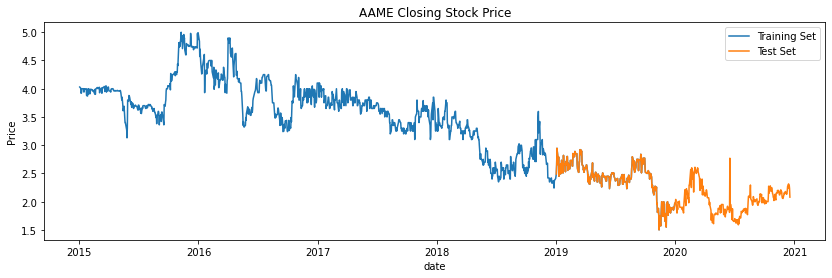

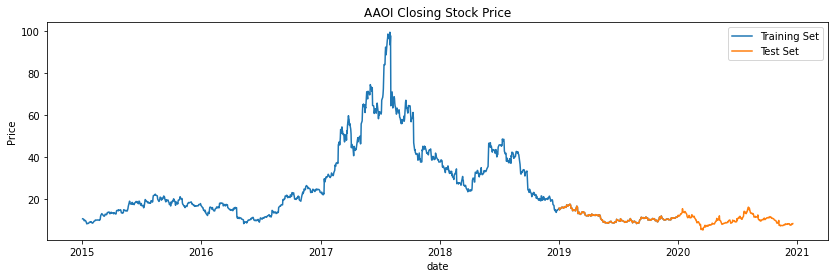

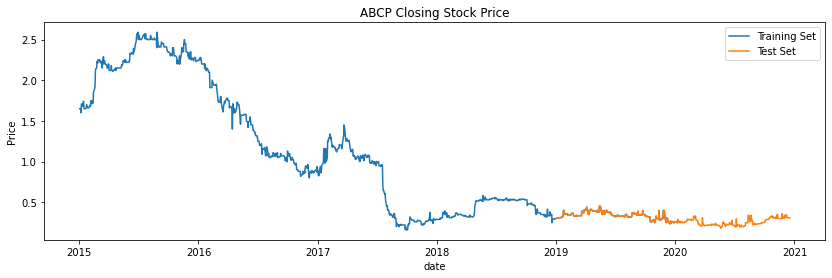

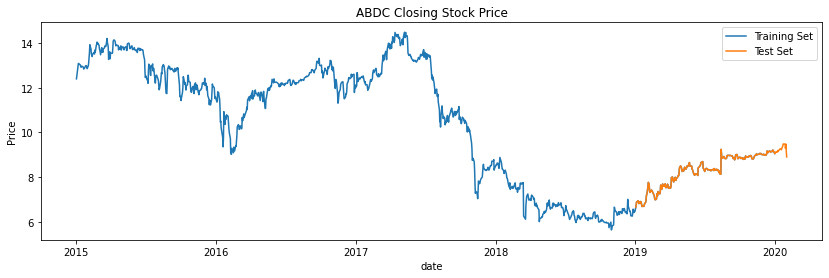

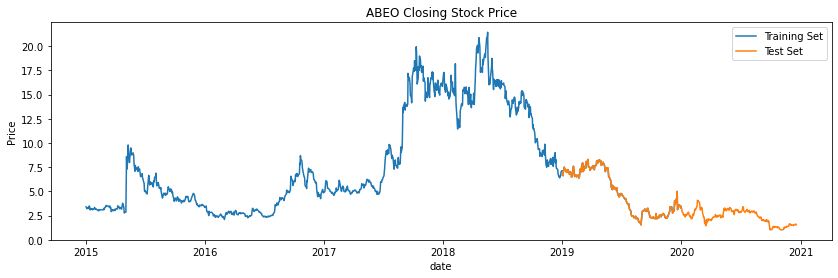

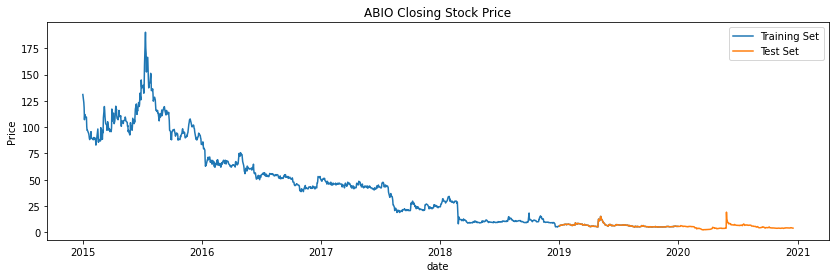

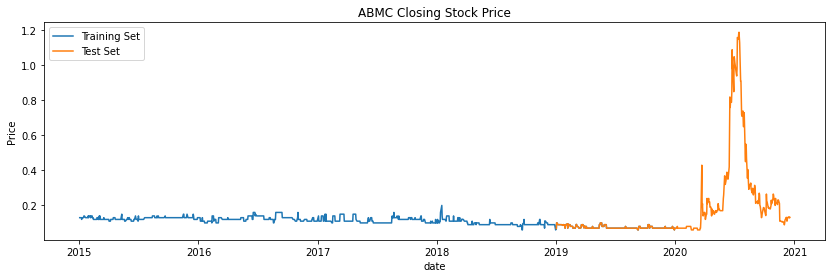

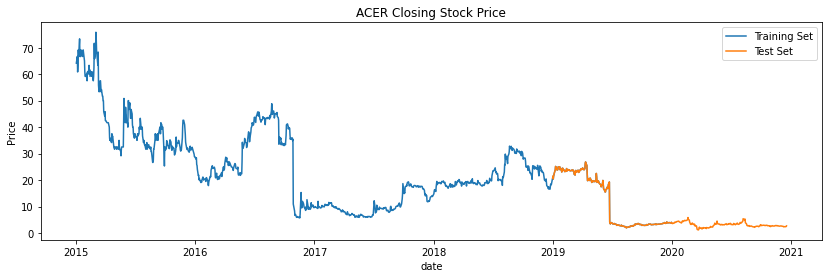

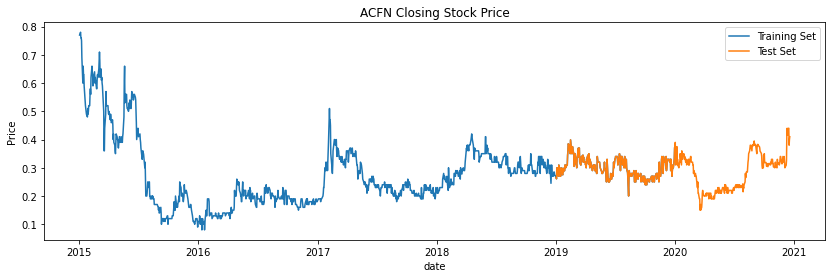

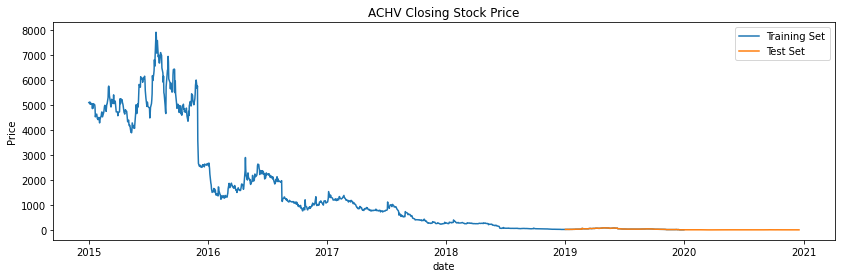

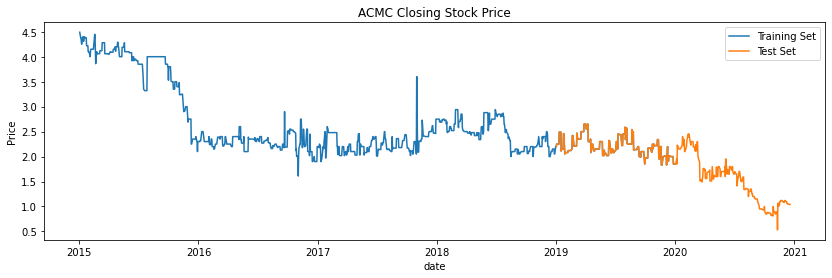

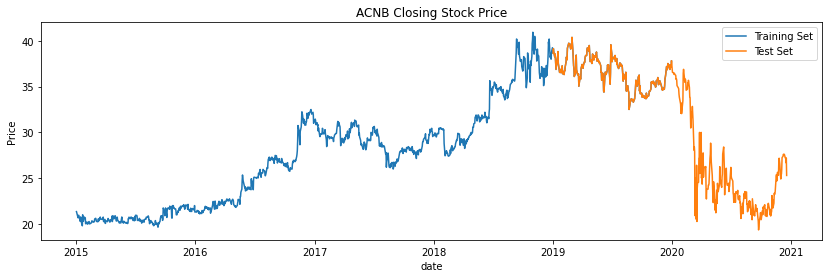

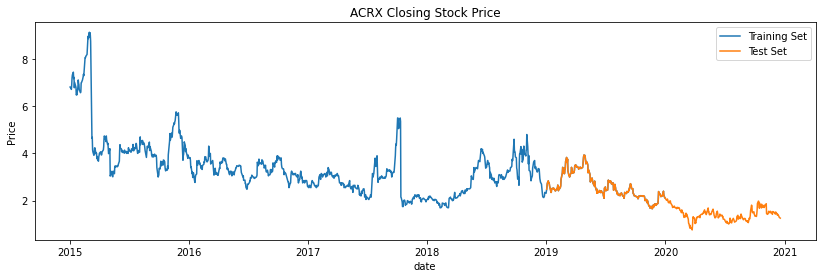

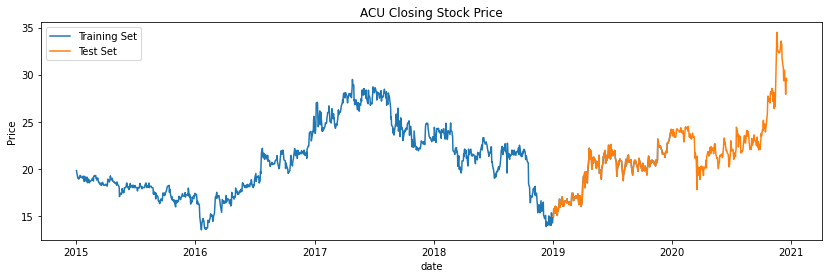

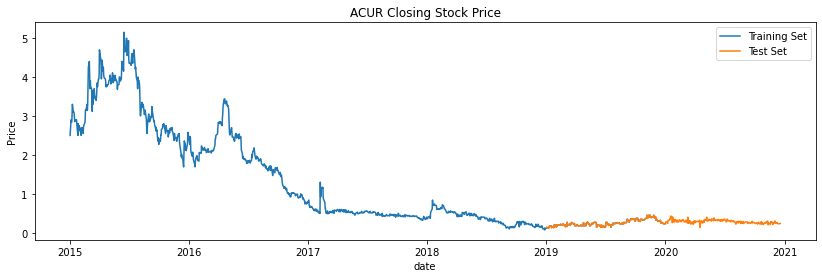

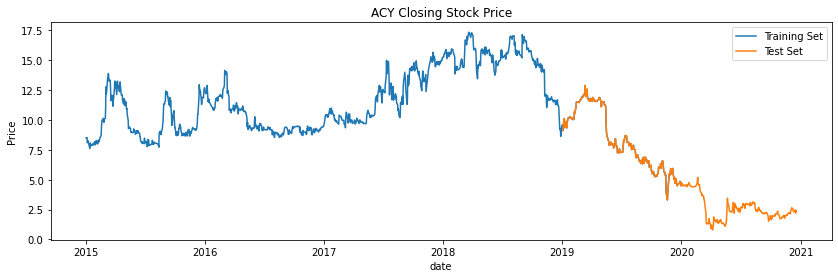

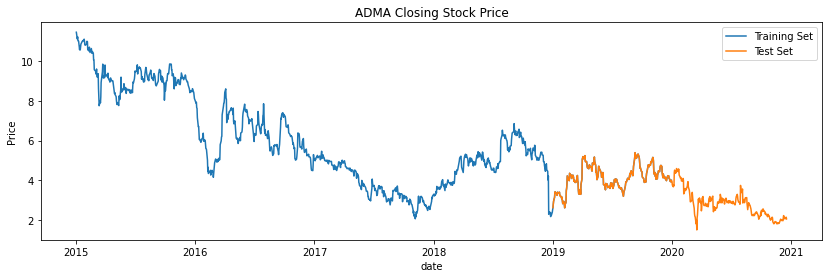

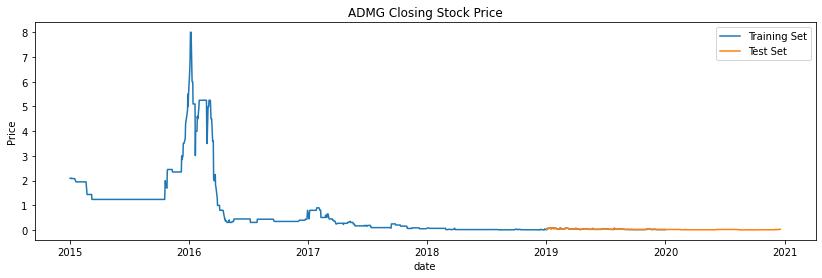

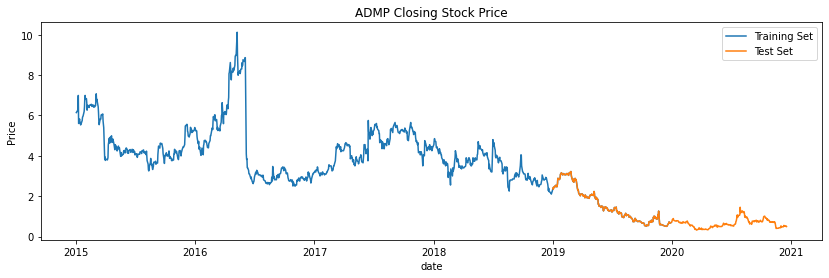

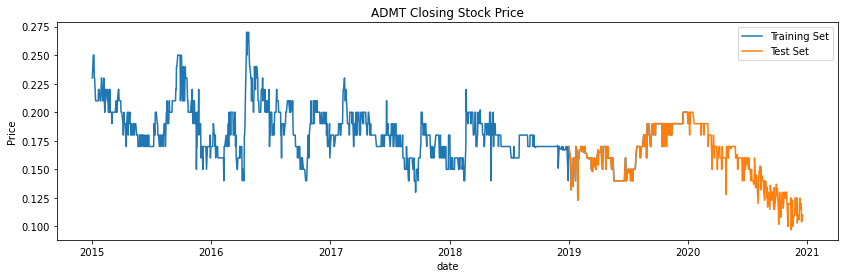

In [37]:
# We plot all companies we pick and paint which one is the training set and test set
#we stop at the ticker ADMT as it will take too long to load everything
# blue is the training data, orange is the test data
#some stocks have no test set at all
for i in stockList:
        plt.figure(figsize=(14,4))
        plt.plot(df_new[i]["Train"])
        plt.plot(df_new[i]["Test"])
        plt.ylabel("Price")
        plt.xlabel("date")
        plt.legend(["Training Set", "Test Set"])
        plt.title(i + " Closing Stock Price")
        if i == "ADMT":
            break

We rescale all stock price to zero for the lowest and 1 for the highest. Each of company have their own scale. We make another two dictionary which contain scaled price for each company. One contain train set and another contain test set.

We also create another dictionary for collecting the scaller. This will be useful when we want to inverse transform our prediction.

In [40]:
# Scaling the training set using MinMaxScalr
transform_train = {}
transform_test = {}
scaler = {}

for num, i in enumerate(stockList):
    sc = MinMaxScaler(feature_range=(0,1))
    a0 = np.array(df_new[i]["Train"])
    a1 = np.array(df_new[i]["Test"])
    a0 = a0.reshape(a0.shape[0],1)
    a1 = a1.reshape(a1.shape[0],1)
#     print(a1)
    try:
    #it found an array with no samples, meaning that it does not have values for 2019 to 2021, i have to either append the original dataset or just use throw error for this
        transform_train[i] = sc.fit_transform(a0)
        transform_test[i] = sc.fit_transform(a1)
    except ValueError:
        pass  # do nothing!

    
del a0
del a1
#should i just drop all stocks with no values after 2019

In [41]:
# We print the shape of our transformed set. Few company have more than the other. 
# This over value should be removed so the input will be uniform in term of shape
for i in transform_train.keys():
    print(i, transform_train[i].shape)
print("\n")    


AAME (1258, 1)
AAOI (1258, 1)
ABCP (1258, 1)
ABDC (1258, 1)
ABEO (1258, 1)
ABIO (1258, 1)
ABMC (1258, 1)
ACER (1258, 1)
ACFN (1258, 1)
ACHV (1258, 1)
ACMC (1258, 1)
ACNB (1258, 1)
ACRX (1258, 1)
ACU (1258, 1)
ACUR (1258, 1)
ACY (1258, 1)
ADMA (1258, 1)
ADMG (1258, 1)
ADMP (1258, 1)
ADMT (1258, 1)
ADUS (1258, 1)
ADYX (1258, 1)
AE (1258, 1)
AEGG (1258, 1)
AEHR (1258, 1)
AERI (1258, 1)
AEY (1258, 1)
AFHIF (1258, 1)
AGHC (1258, 1)
AGRX (1258, 1)
AGTC (1258, 1)
AGYS (1258, 1)
AHC (1258, 1)
AHH (1258, 1)
AHPI (1258, 1)
AIKI (1258, 1)
AIM (1258, 1)
AINC (1258, 1)
AIRI (1258, 1)
AIRT (1258, 1)
AJX (1229, 1)
AKAOQ (1258, 1)
AKBA (1258, 1)
AKER (1258, 1)
AKTS (1153, 1)
ALBO (1258, 1)
ALDX (1258, 1)
ALIM (1258, 1)
ALOT (1258, 1)
ALSK (1258, 1)
ALT (1258, 1)
ALTX (1258, 1)
AMBR (1131, 1)
AMNB (1258, 1)
AMOT (1258, 1)
AMPE (1258, 1)
AMRB (1258, 1)
AMRK (1258, 1)
AMRS (1258, 1)
AMS (1258, 1)
AMSC (1258, 1)
AMSWA (1258, 1)
AMTX (1258, 1)
AMTY (1258, 1)
ANCX (1027, 1)
ANDR (1258, 1)
ANFC (1258, 1)
ANI

MOC (1041, 1)
MOFG (1258, 1)
MOJO (1258, 1)
MOSY (1258, 1)
MPAD (1258, 1)
MPAY (1071, 1)
MPB (1258, 1)
MPX (1258, 1)
MRCC (1258, 1)
MRIN (1258, 1)
MRLN (1258, 1)
MRMD (1258, 1)
MRNS (1258, 1)
MSB (1258, 1)
MSBF (1258, 1)
MSL (1188, 1)
MSN (1258, 1)
MSON (1258, 1)
MSRT (1192, 1)
MTBC (1258, 1)
MTEM (1258, 1)
MTEX (1258, 1)
MUX (1258, 1)
MVBF (1258, 1)
MVC (1258, 1)
MVEN (1258, 1)
MVIS (1258, 1)
MX (1258, 1)
MXC (1258, 1)
MXWL (1100, 1)
NAII (1258, 1)
NANX (1258, 1)
NATH (1258, 1)
NATR (1258, 1)
NAUH (1258, 1)
NAVB (1258, 1)
NBIO (1258, 1)
NBN (1258, 1)
NBSE (1258, 1)
NBY (1258, 1)
NCBS (1258, 1)
NCOM (1015, 1)
NEN (1258, 1)
NEO (1258, 1)
NEON (1258, 1)
NEPT (1258, 1)
NERV (1258, 1)
NETE (1258, 1)
NEWT (1258, 1)
NHLD (1258, 1)
NHTC (1258, 1)
NICK (1258, 1)
NIMU (1258, 1)
NKSH (1258, 1)
NLBS (1258, 1)
NLST (1258, 1)
NLTX (1258, 1)
NMGX (1258, 1)
NMRD (1258, 1)
NNVC (1258, 1)
NOA (1258, 1)
NOBH (1258, 1)
NORNQ (1258, 1)
NOVC (1258, 1)
NPTN (1258, 1)
NRIM (1258, 1)
NSEC (1258, 1)
NSPR (1258

In [42]:
for i in transform_test.keys():
    print(i, transform_test[i].shape)

AAME (497, 1)
AAOI (497, 1)
ABCP (497, 1)
ABDC (273, 1)
ABEO (497, 1)
ABIO (497, 1)
ABMC (497, 1)
ACER (497, 1)
ACFN (497, 1)
ACHV (497, 1)
ACMC (497, 1)
ACNB (497, 1)
ACRX (497, 1)
ACU (497, 1)
ACUR (497, 1)
ACY (497, 1)
ADMA (497, 1)
ADMG (497, 1)
ADMP (497, 1)
ADMT (497, 1)
ADUS (497, 1)
ADYX (497, 1)
AE (497, 1)
AEGG (497, 1)
AEHR (497, 1)
AERI (497, 1)
AEY (497, 1)
AFHIF (497, 1)
AGHC (497, 1)
AGRX (497, 1)
AGTC (497, 1)
AGYS (497, 1)
AHC (497, 1)
AHH (497, 1)
AHPI (497, 1)
AIKI (497, 1)
AIM (497, 1)
AINC (497, 1)
AIRI (497, 1)
AIRT (497, 1)
AJX (497, 1)
AKAOQ (358, 1)
AKBA (497, 1)
AKER (497, 1)
AKTS (497, 1)
ALBO (497, 1)
ALDX (497, 1)
ALIM (497, 1)
ALOT (497, 1)
ALSK (497, 1)
ALT (497, 1)
ALTX (497, 1)
AMBR (125, 1)
AMNB (497, 1)
AMOT (497, 1)
AMPE (497, 1)
AMRB (497, 1)
AMRK (497, 1)
AMRS (497, 1)
AMS (497, 1)
AMSC (497, 1)
AMSWA (497, 1)
AMTX (497, 1)
AMTY (497, 1)
ANCX (21, 1)
ANDR (497, 1)
ANFC (497, 1)
ANIX (497, 1)
AOLS (497, 1)
AOSL (497, 1)
AP (497, 1)
APDN (497, 1)
APE

NEON (497, 1)
NEPT (497, 1)
NERV (497, 1)
NETE (497, 1)
NEWT (497, 1)
NHLD (497, 1)
NHTC (497, 1)
NICK (497, 1)
NIMU (497, 1)
NKSH (497, 1)
NLBS (497, 1)
NLST (497, 1)
NLTX (497, 1)
NMGX (497, 1)
NMRD (497, 1)
NNVC (497, 1)
NOA (497, 1)
NOBH (497, 1)
NORNQ (497, 1)
NOVC (497, 1)
NPTN (497, 1)
NRIM (497, 1)
NSEC (497, 1)
NSPR (497, 1)
NSPX (497, 1)
NSSC (497, 1)
NSTG (497, 1)
NSYS (497, 1)
NTIC (497, 1)
NTIP (497, 1)
NTN (497, 1)
NTRP (484, 1)
NTRU (497, 1)
NTWK (497, 1)
NURO (497, 1)
NUVR (497, 1)
NVEE (497, 1)
NVFY (497, 1)
NVLNF (194, 1)
NVOS (497, 1)
NVUS (497, 1)
NWFL (497, 1)
NWHM (497, 1)
NWIN (497, 1)
NWPX (497, 1)
NXTD (497, 1)
NYNY (222, 1)
OBCI (497, 1)
OBLG (497, 1)
OCC (497, 1)
OCFC (497, 1)
OCGN (497, 1)
OCUP (497, 1)
ODC (497, 1)
OEG (497, 1)
OESX (497, 1)
OFED (497, 1)
OFLX (497, 1)
OFS (497, 1)
OGEN (497, 1)
OHAI (244, 1)
OLBK (227, 1)
OMCM (196, 1)
OMEX (497, 1)
OMNT (82, 1)
OMTK (497, 1)
ONCS (497, 1)
ONCT (497, 1)
ONSM (26, 1)
ONTX (497, 1)
OPCH (497, 1)
OPGN (497, 1

In [49]:
type(transform_test)

dict

In [55]:
keys=list(transform_test.keys())
values=list(transform_test.values())


In [58]:
len(values)

1452

In [57]:
values[1258]

array([[0.79220779],
       [0.79220779],
       [0.66233766],
       [0.77922078],
       [0.79220779],
       [0.79220779],
       [1.        ],
       [0.98701299],
       [0.66233766],
       [0.46753247],
       [0.53246753],
       [0.53246753],
       [0.53246753],
       [0.53246753],
       [0.4025974 ],
       [0.42857143],
       [0.4025974 ],
       [0.76623377],
       [0.79220779],
       [0.79220779],
       [0.79220779],
       [0.79220779],
       [0.53246753],
       [0.79220779],
       [0.79220779],
       [0.79220779],
       [0.79220779],
       [0.79220779],
       [0.79220779],
       [0.46753247],
       [0.77922078],
       [0.79220779],
       [0.79220779],
       [0.79220779],
       [0.74025974],
       [0.77922078],
       [0.77922078],
       [0.79220779],
       [0.66233766],
       [0.66233766],
       [0.66233766],
       [0.77922078],
       [0.79220779],
       [0.79220779],
       [0.79220779],
       [0.7012987 ],
       [0.66233766],
       [0.597

In [91]:
transform_test['AAME'].shape[0]

497

In [75]:
transform_train

{'AAME': array([[0.72285714],
        [0.71714286],
        [0.69142857],
        ...,
        [0.1       ],
        [0.12      ],
        [0.13428571]]),
 'AAOI': array([[0.02641675],
        [0.02488217],
        [0.02049764],
        ...,
        [0.0344185 ],
        [0.03540502],
        [0.03836457]]),
 'ABCP': array([[0.61316872],
        [0.61316872],
        [0.59259259],
        ...,
        [0.03703704],
        [0.03703704],
        [0.04115226]]),
 'ABDC': array([[0.76410835],
        [0.81264108],
        [0.82844244],
        ...,
        [0.40180587],
        [0.39051919],
        [0.38600451]]),
 'ABEO': array([[0.09342039],
        [0.08387745],
        [0.08588649],
        ...,
        [0.09417378],
        [0.09794073],
        [0.08689101]]),
 'ABIO': array([[0.68042739],
        [0.63963089],
        [0.61250337],
        ...,
        [0.00393934],
        [0.00377745],
        [0.00410663]]),
 'ABMC': array([[0.5       ],
        [0.5       ],
        [0.5      

In [87]:
len(y_t)

1198

In [98]:
testset['AAME']['X'].shape

(437, 60, 1)

In [100]:
np.array(X_test).shape

(437, 60)

In [102]:
np.array(X_train).shape

(0,)

In [105]:
X_train

array([], dtype=float64)

In [107]:
# We think 60 feature will be enough training. We prepare shape our test and train set for neural network input

trainset = {}
testset = {}
for j in stockList:
    trainset[j] = {}
    X_train = []
    y_train = []
    for i in range(0,1259):
        if (i < transform_test[j].shape[0]):
            X_train.append(transform_train[j][i-60:i,0])
            y_train.append(transform_train[j][i,0])
        else:
            break
    X_train, y_train = np.array(X_train), np.array(y_train)
    print(X_train)
#     trainset[j]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    trainset[j]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    
    trainset[j]["y"] = y_train
    
    testset[j] = {}
    X_test = []
    y_test = []    
    for i in range(60, 755):
        if(i < transform_test[j].shape[0]):
            X_test.append(transform_test[j][i-60:i,0])
            y_test.append(transform_test[j][i,0])
        else:
            break
    X_test, y_test = np.array(X_test), np.array(y_test)
#     testset[j]["X"] = np.reshape(X_test, (X_test.shape[0], X_train.shape[1], 1))
    testset[j]["X"] = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    testset[j]["y"] = y_test


[array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array([], dtype=float64)
 array([], dtype=float64) array

<ipython-input-107-a87abbaf8015>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  X_train, y_train = np.array(X_train), np.array(y_train)


IndexError: tuple index out of range

In [106]:
trainset = {}
testset = {}
for j in stockList:
    trainset[j] = {}
    X_train = []
    y_train = []
    for i in range(0,2516):
        X_train.append(transform_train[j][i-60:i,0])
        y_train.append(transform_train[j][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset[j]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    trainset[j]["y"] = y_train
    
    testset[j] = {}
    X_test = []
    y_test = []    
    for i in range(60, 755):
        X_test.append(transform_test[j][i-60:i,0])
        y_test.append(transform_test[j][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset[j]["X"] = np.reshape(X_test, (X_test.shape[0], X_train.shape[1], 1))
    testset[j]["y"] = y_test

IndexError: index 1258 is out of bounds for axis 0 with size 1258

In [ ]:
X_train.index(3,4,5)


# Single NN for multiple stocks
- However we need to be careful while performing a train test split. We need to first split and then zero pad the train test portions. Just like we have to scale the data before the split to avoid train data leaking into test data.
- There fore the order of data preparation is as follows
- Split the time series data in to train and test, we will take 80% of data as train and remaining as test data.
- Scale the train data, use the same scaler to transform the test data. Thus you will end up with one scaler per symbol
- Zero pad the train and test data
- Reshape train and test data

### Data Preparation

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-whitegrid')

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [ ]:
# Some functions to help out with
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [ ]:
import os


In [ ]:
stop below here is no longer single nn


below are the functions needed for data preprocessing

In [ ]:
def Scale(train, test):
    scaler = MinMaxScaler()
    train = np.array(train)
    test = np.array(test)
    train = scaler.fit_transform(train.reshape(train.shape[0], -1))
    test = scaler.transform(test.reshape(test.shape[0], -1))
    return scaler, train, test

In [ ]:
def PrepareData(sequence, n_steps):
    x, y = [],[]
    length = sequence.shape[0]
    for i in range(length):
        end_index = i + n_steps
    
        if(end_index >= length):
            break;
     
        x.append(sequence[i:end_index]) 
        y.append(sequence[end_index])
    
    x = np.array(x)
    y = np.array(y)
    x = x.reshape(x.shape[0], n_steps, 1)
    return x, y

In [ ]:
def CreateModel(rate = 0.4, n_features = 501):
    model = Sequential()
    model.add(GRU(256, return_sequences=True, input_shape = (2, n_features)))
    model.add(Dropout(rate))
    model.add(LSTM(256))
    model.add(Dropout(rate))
    model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(n_features)) # Number of outputs
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    return model

In [ ]:
def split_sequences(sequences, n_steps):
    x, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
    
        if(end_ix > len(sequences)-1):
            break
      
        seq_x, seq_y = sequences[i: end_ix, :], sequences[end_ix, :]
    
        x.append(seq_x)
        y.append(seq_y)
    
    x = np.array(x)
    y = np.array(y)
  
    return x, y

In [ ]:
def ZeroPadding(sequence, maxPaddingWidth):
    length = len(sequence)
    if(length < maxPaddingWidth):
        retVal = np.pad(sequence.flatten(), (0, maxPaddingWidth-length), 'constant', constant_values=[0])
        return retVal
    return sequence
#   """
#   sequence = [1,2,3,4]
#   return sequence = [1,2,3,4,0,0,0,.... upto 1791 index]
  
#   sequence = [1,2,3,4, 5, 6, 7 .... 1791]
#   return sequence = [1,2,3,4, 5, 6, 7..... 1791] -> No padding as the length match
#   """


In [ ]:
data

In [ ]:
features = [col for col in df.columns if not col == 'Target']
X = data[features]
y = data[['Target']].values

In [ ]:
below is modelling already

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV


model = KerasRegressor(build_fn=CreateModel,verbose = 0)
params = {'epochs' : [100,150,200],
          'batch_size' : [100, 150],
          'n_features' : [y_test.shape[1]],
          'rate': [0.3],
          'validation_data' : [(X_test_sc, y_test)]}
# regressor = GridSearchCV(estimator = model, param_grid = params, n_jobs = 1, refit=True, scoring='neg_mean_squared_error')
# regressor.fit(X_train_sc, y_train)
# preds = regressor.predict(X_test_sc)

# Train/Test Split

In [ ]:
features = [col for col in df.columns if not col == 'Target']
X = df[features]
y = df[['Target']].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
X_train.head()

In [ ]:
X_train.shape

In [ ]:
X_test.shape

# Feature Scaling

In [ ]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

# TimeseriesGenerator
- We'll now convert our data into series' using TimeseriesGenerator. The length parameter dictates how many rows will constitute a sample. The generator also creates our batches.

In [ ]:
train_sequences = TimeseriesGenerator(X_train_sc, y_train, length=3, batch_size=64)


In [ ]:
batch_x, batch_y = train_sequences[0]


In [ ]:
batch_x.shape


In [ ]:
batch_y.shape


In [ ]:
batch_x[0]


In [ ]:
pd.DataFrame(X_train_sc, columns=X_train.columns).head(3)


In [ ]:
test_sequences = TimeseriesGenerator(X_test_sc, y_test, length=3, batch_size=64)


In [ ]:
len(features)

# Modelling

## GRU

In [ ]:
model = Sequential()
model.add(GRU(34, input_shape=(3, 34), return_sequences=True)) #34 features (Open, High, ... 8-K)  and 3 rows for one sample 
model.add(GRU(34))

model.add(Dense(4, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=Adam(lr=.0005), loss='binary_crossentropy', metrics=['acc'])

history = model.fit_generator(train_sequences, validation_data=test_sequences, epochs=20, verbose=0)
# fit is used when the entire training dataset can fit into the memory and no data augmentation is applied. . fit_generator is used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied.

In [ ]:
history2 = model.fit(X_train_sc,
                        y_train,
                        validation_data=(X_test_sc, y_test),
                        epochs=5,
                        verbose=1)

In [ ]:
model.summary()

In [ ]:
y_pred=history.predict(X_test_sc)
# y_test=scaler.inverse_transform(y_test)
# y_pred=scaler.inverse_transform(y_pred)

In [ ]:
_, train_acc = model.evaluate(X_train_sc, y_train, verbose=0)
_, test_acc = model.evaluate(X_test_sc, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();


In [ ]:

plt.plot(history.history['acc'], label='Train accuracy')
plt.plot(history.history['val_acc'], label='Test accuracy')
plt.legend();

## LSTM

In [ ]:
model = Sequential()
model.add(LSTM(34, input_shape=(3, 34), return_sequences=True)) #34 features (Open, High, ... 8-K)  and 3 rows for one sample 
model.add(LSTM(34))

model.add(Dense(4, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=Adam(lr=.0005), loss='binary_crossentropy', metrics=['acc'])

history = model.fit_generator(train_sequences, validation_data=test_sequences, epochs=20, verbose=0)

In [ ]:
model.summary()

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();


In [ ]:

plt.plot(history.history['acc'], label='Train accuracy')
plt.plot(history.history['val_acc'], label='Test accuracy')
plt.legend();

In [ ]:
# test_sequences = TimeseriesGenerator(X_test_sc, y_test, length=3, batch_size=64)


In [ ]:
X_test_sc

In [ ]:
y_test

In [ ]:
y_pred=model.predict(X_test_sc)
y_test=scaler.inverse_transform(y_test)
y_pred=scaler.inverse_transform(y_pred)

# Merge all Data

In [ ]:
stop

In [ ]:

merged_df = price_volume_sorted_one_year.merge(daily_metrics_sorted_one_year, how="left", left_index=True,right_on='ticker')


In [ ]:
_, train_acc = model.evaluate(X_train_sc, y_train, verbose=0)
_, test_acc = model.evaluate(X_test_sc, y_test, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

In [ ]:
# merged_df = price_volume_sorted_one_year.merge(daily_metrics_sorted_one_year, how="left", left_index=True, right_index=True)


In [ ]:
merged_df

In [ ]:
merged_df = merged_df(event_filtered_one_year, how="left", left_index=True, right_index=True)

In [ ]:
merged_df

In [ ]:
stop

In [ ]:
r = a.join(b, on='date')

In [ ]:
d.join(f)

In [ ]:
find something less time consuming than concat

In [ ]:
df = pd.concat([a,b], axis = 1)

In [ ]:
df = pd.concat([d,f], axis = 1)

In [ ]:
df

In [ ]:
df = pd.concat([df,e], axis = 1)

In [ ]:
df

In [ ]:
#save df as a csv because it takes too long to run
df.to_csv('../dataset/modelling_dataset.csv')

In [ ]:
stop

In [ ]:
df = pd.merge(price_volume_sorted,daily_metrics_sorted, left_index=True, right_index=True, how='left')

In [ ]:
df = pd.merge(df,event_filtered, left_index=True, right_index=True, how='left')

In [ ]:
df.head()

In [ ]:
stop

# LSTM: Multiple stock ticker prices at a time
Before we build the LSTM model we need to prepare our data for the LSTM. The data need to be scaled and reshaped.

In [ ]:
#
def Scale(train, test):
  scaler = MinMaxScaler()
  train = np.array(train)
  test = np.array(test)
  train = scaler.fit_transform(train.reshape(train.shape[0], -1))
  test = scaler.transform(test.reshape(test.shape[0], -1))
  return scaler, train, test

In [ ]:
def PrepareData(sequence, n_steps):
  x, y = [],[]
  length = sequence.shape[0]
  for i in range(length):
    end_index = i + n_steps
    
    if(end_index >= length):
      break;
     
    x.append(sequence[i:end_index]) 
    y.append(sequence[end_index])
    
  x = np.array(x)
  y = np.array(y)
  x = x.reshape(x.shape[0], n_steps, 1)
  return x, y

In [ ]:
def CreateModel(rate = 0.4, n_features = 501):
  model = Sequential()
  model.add(GRU(256, return_sequences=True, input_shape = (2, n_features)))
  model.add(Dropout(rate))
  model.add(LSTM(256))
  model.add(Dropout(rate))
  model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(n_features)) # Number of outputs
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
  return model

In [ ]:
def split_sequences(sequences, n_steps):
  x, y = list(), list()
  for i in range(len(sequences)):
    end_ix = i + n_steps
    
    if(end_ix > len(sequences)-1):
      break
      
    seq_x, seq_y = sequences[i: end_ix, :], sequences[end_ix, :]
    
    x.append(seq_x)
    y.append(seq_y)
    
  x = np.array(x)
  y = np.array(y)
  
  return x, y

In [ ]:
# 1792 is the maximum number of observations for most of the stocks
# In order to predict the stock prices using multiple series
# together in an LSTM, we need to Zeropad the unknown values
MAX_VALUES_TRAIN = 1409 # 1792 * 0.8
MAX_VALUES_TEST = 353 # 1792 - 1409
def ZeroPadding(sequence, maxPaddingWidth):
    length = len(sequence)
    if(length < maxPaddingWidth):
        retVal = np.pad(sequence.flatten(), (0, maxPaddingWidth-length), 'constant', constant_values=[0])
        return retVal
    return sequence

#   sequence = [1,2,3,4]
#   return sequence = [1,2,3,4,0,0,0,.... upto 1791 index]
  
#   sequence = [1,2,3,4, 5, 6, 7 .... 1791]
#   return sequence = [1,2,3,4, 5, 6, 7..... 1791] -> No padding as the length match
  